# Missing Values

In [1]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer

# Charger le dataset
file_path = "C:/Users/chaym/Desktop/NasaProject/data/processed/Kepler_filtered.csv"
df = pd.read_csv(file_path)

print(f"Dimensions initiales du dataset: {df.shape}")
print(f"Valeurs manquantes initiales:\n{df.isnull().sum()}\n")

# 1. Imputation par la médiane pour les colonnes spécifiées
median_columns = [
    'koi_steff', 'koi_steff_err1', 'koi_steff_err2',
    'koi_slogg', 'koi_slogg_err1', 'koi_slogg_err2',
    'koi_period_err1', 'koi_period_err2',
    'koi_duration_err1', 'koi_duration_err2',
    'koi_depth', 'koi_depth_err1', 'koi_depth_err2',
    'koi_prad', 'koi_prad_err1', 'koi_prad_err2',
    'koi_kepmag', 'koi_teq', 'koi_model_snr'
]

print("Étape 1: Imputation par la médiane...")
for col in median_columns:
    if col in df.columns:
        median_value = df[col].median()
        missing_count = df[col].isnull().sum()
        if missing_count > 0:
            df[col].fillna(median_value, inplace=True)
            print(f"  - {col}: {missing_count} valeurs remplacées par {median_value:.2f}")

# 2. Suppression des lignes avec valeurs manquantes pour les colonnes d'impact et d'insolation
drop_rows_columns = [
    'koi_impact', 'koi_impact_err1', 'koi_impact_err2',
    'koi_insol', 'koi_insol_err1', 'koi_insol_err2'
]

print(f"\nÉtape 2: Suppression des lignes avec valeurs manquantes...")
rows_before = len(df)
df.dropna(subset=drop_rows_columns, inplace=True)
rows_after = len(df)
print(f"  - {rows_before - rows_after} lignes supprimées")
print(f"  - Nouvelles dimensions: {df.shape}")

# 3. Suppression des colonnes koi_teq_err1 et koi_teq_err2
drop_columns = ['koi_teq_err1', 'koi_teq_err2']

print(f"\nÉtape 3: Suppression des colonnes...")
for col in drop_columns:
    if col in df.columns:
        df.drop(columns=[col], inplace=True)
        print(f"  - Colonne {col} supprimée")

# 4. Imputation par KNN pour koi_srad et ses erreurs
knn_columns = ['koi_srad', 'koi_srad_err1', 'koi_srad_err2']

print(f"\nÉtape 4: Imputation par KNN (k=5) pour les colonnes de rayon stellaire...")

# Vérifier s'il y a des valeurs manquantes dans ces colonnes
missing_in_knn = df[knn_columns].isnull().sum()
if missing_in_knn.sum() > 0:
    print(f"  - Valeurs manquantes avant KNN:")
    for col in knn_columns:
        if col in df.columns:
            print(f"    * {col}: {df[col].isnull().sum()}")
    
    # Sélectionner les colonnes numériques pour KNN
    # On utilise les colonnes sans valeurs manquantes + les colonnes à imputer
    numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    
    # Créer l'imputer KNN
    imputer = KNNImputer(n_neighbors=5, weights='distance')
    
    # Appliquer KNN sur les colonnes numériques
    df[numeric_cols] = imputer.fit_transform(df[numeric_cols])
    
    print(f"  - Imputation KNN terminée")
    print(f"  - Valeurs manquantes après KNN:")
    for col in knn_columns:
        print(f"    * {col}: {df[col].isnull().sum()}")
else:
    print("  - Aucune valeur manquante détectée dans les colonnes koi_srad")

# Sauvegarder le dataset nettoyé
output_path = "C:/Users/chaym/Desktop/NasaProject/data/processed/Kepler_cleaned.csv"
df.to_csv(output_path, index=False)

print(f"\n{'='*60}")
print(f"RÉSUMÉ FINAL")
print(f"{'='*60}")
print(f"Dimensions finales: {df.shape}")
print(f"Valeurs manquantes restantes: {df.isnull().sum().sum()}")
print(f"\nDataset nettoyé sauvegardé dans:\n{output_path}")

# Afficher un aperçu des premières lignes
print(f"\n{'='*60}")
print("Aperçu du dataset nettoyé:")
print(df.head())
print(f"\n{'='*60}")
print("Informations sur les colonnes:")
print(df.info())

Dimensions initiales du dataset: (9564, 35)
Valeurs manquantes initiales:
kepid                   0
kepoi_name              0
koi_disposition         0
koi_period              0
koi_period_err1       454
koi_period_err2       454
koi_impact            363
koi_impact_err1       454
koi_impact_err2       454
koi_duration            0
koi_duration_err1     454
koi_duration_err2     454
koi_depth             363
koi_depth_err1        454
koi_depth_err2        454
koi_prad              363
koi_prad_err1         363
koi_prad_err2         363
koi_teq               363
koi_teq_err1         9564
koi_teq_err2         9564
koi_insol             321
koi_insol_err1        321
koi_insol_err2        321
koi_model_snr         363
koi_steff             363
koi_steff_err1        468
koi_steff_err2        483
koi_slogg             363
koi_slogg_err1        468
koi_slogg_err2        468
koi_srad              363
koi_srad_err1         468
koi_srad_err2         468
koi_kepmag              1
dtype: int64

Ét

C:\Users\chaym\AppData\Local\Temp\ipykernel_10908\2464410324.py:29: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median_value, inplace=True)


  - Imputation KNN terminée
  - Valeurs manquantes après KNN:
    * koi_srad: 0
    * koi_srad_err1: 0
    * koi_srad_err2: 0

RÉSUMÉ FINAL
Dimensions finales: (9110, 33)
Valeurs manquantes restantes: 0

Dataset nettoyé sauvegardé dans:
C:/Users/chaym/Desktop/NasaProject/data/processed/Kepler_cleaned.csv

Aperçu du dataset nettoyé:
        kepid kepoi_name koi_disposition  koi_period  koi_period_err1  \
0  10797460.0  K00752.01       CONFIRMED    9.488036     2.775000e-05   
1  10797460.0  K00752.02       CONFIRMED   54.418383     2.479000e-04   
2  10811496.0  K00753.01       CANDIDATE   19.899140     1.494000e-05   
3  10848459.0  K00754.01  FALSE POSITIVE    1.736952     2.630000e-07   
4  10854555.0  K00755.01       CONFIRMED    2.525592     3.761000e-06   

   koi_period_err2  koi_impact  koi_impact_err1  koi_impact_err2  \
0    -2.775000e-05       0.146            0.318           -0.146   
1    -2.479000e-04       0.586            0.059           -0.443   
2    -1.494000e-05     

ANALYSE DES OUTLIERS - DATASET KEPLER
Dimensions du dataset: (9110, 33)

Nombre de colonnes numériques analysées: 30

1. DÉTECTION DES OUTLIERS PAR MÉTHODE IQR

koi_period:
  - Q1: 2.6967, Q3: 37.1065, IQR: 34.4098
  - Limites: [-48.9179, 88.7212]
  - Outliers: 1489 (16.34%)
  - Min: 0.2418, Max: 129995.7784

koi_period_err1:
  - Q1: 0.0000, Q3: 0.0003, IQR: 0.0003
  - Limites: [-0.0004, 0.0007]
  - Outliers: 1650 (18.11%)
  - Min: 0.0000, Max: 0.1725

koi_period_err2:
  - Q1: -0.0003, Q3: -0.0000, IQR: 0.0003
  - Limites: [-0.0007, 0.0004]
  - Outliers: 1650 (18.11%)
  - Min: -0.1725, Max: 0.0000

koi_impact:
  - Q1: 0.1970, Q3: 0.8880, IQR: 0.6910
  - Limites: [-0.8395, 1.9245]
  - Outliers: 80 (0.88%)
  - Min: 0.0000, Max: 100.8060

koi_impact_err1:
  - Q1: 0.0400, Q3: 0.3780, IQR: 0.3380
  - Limites: [-0.4670, 0.8850]
  - Outliers: 736 (8.08%)
  - Min: 0.0000, Max: 85.5400

koi_impact_err2:
  - Q1: -0.4450, Q3: -0.0460, IQR: 0.3990
  - Limites: [-1.0435, 0.5525]
  - Outliers: 120 (

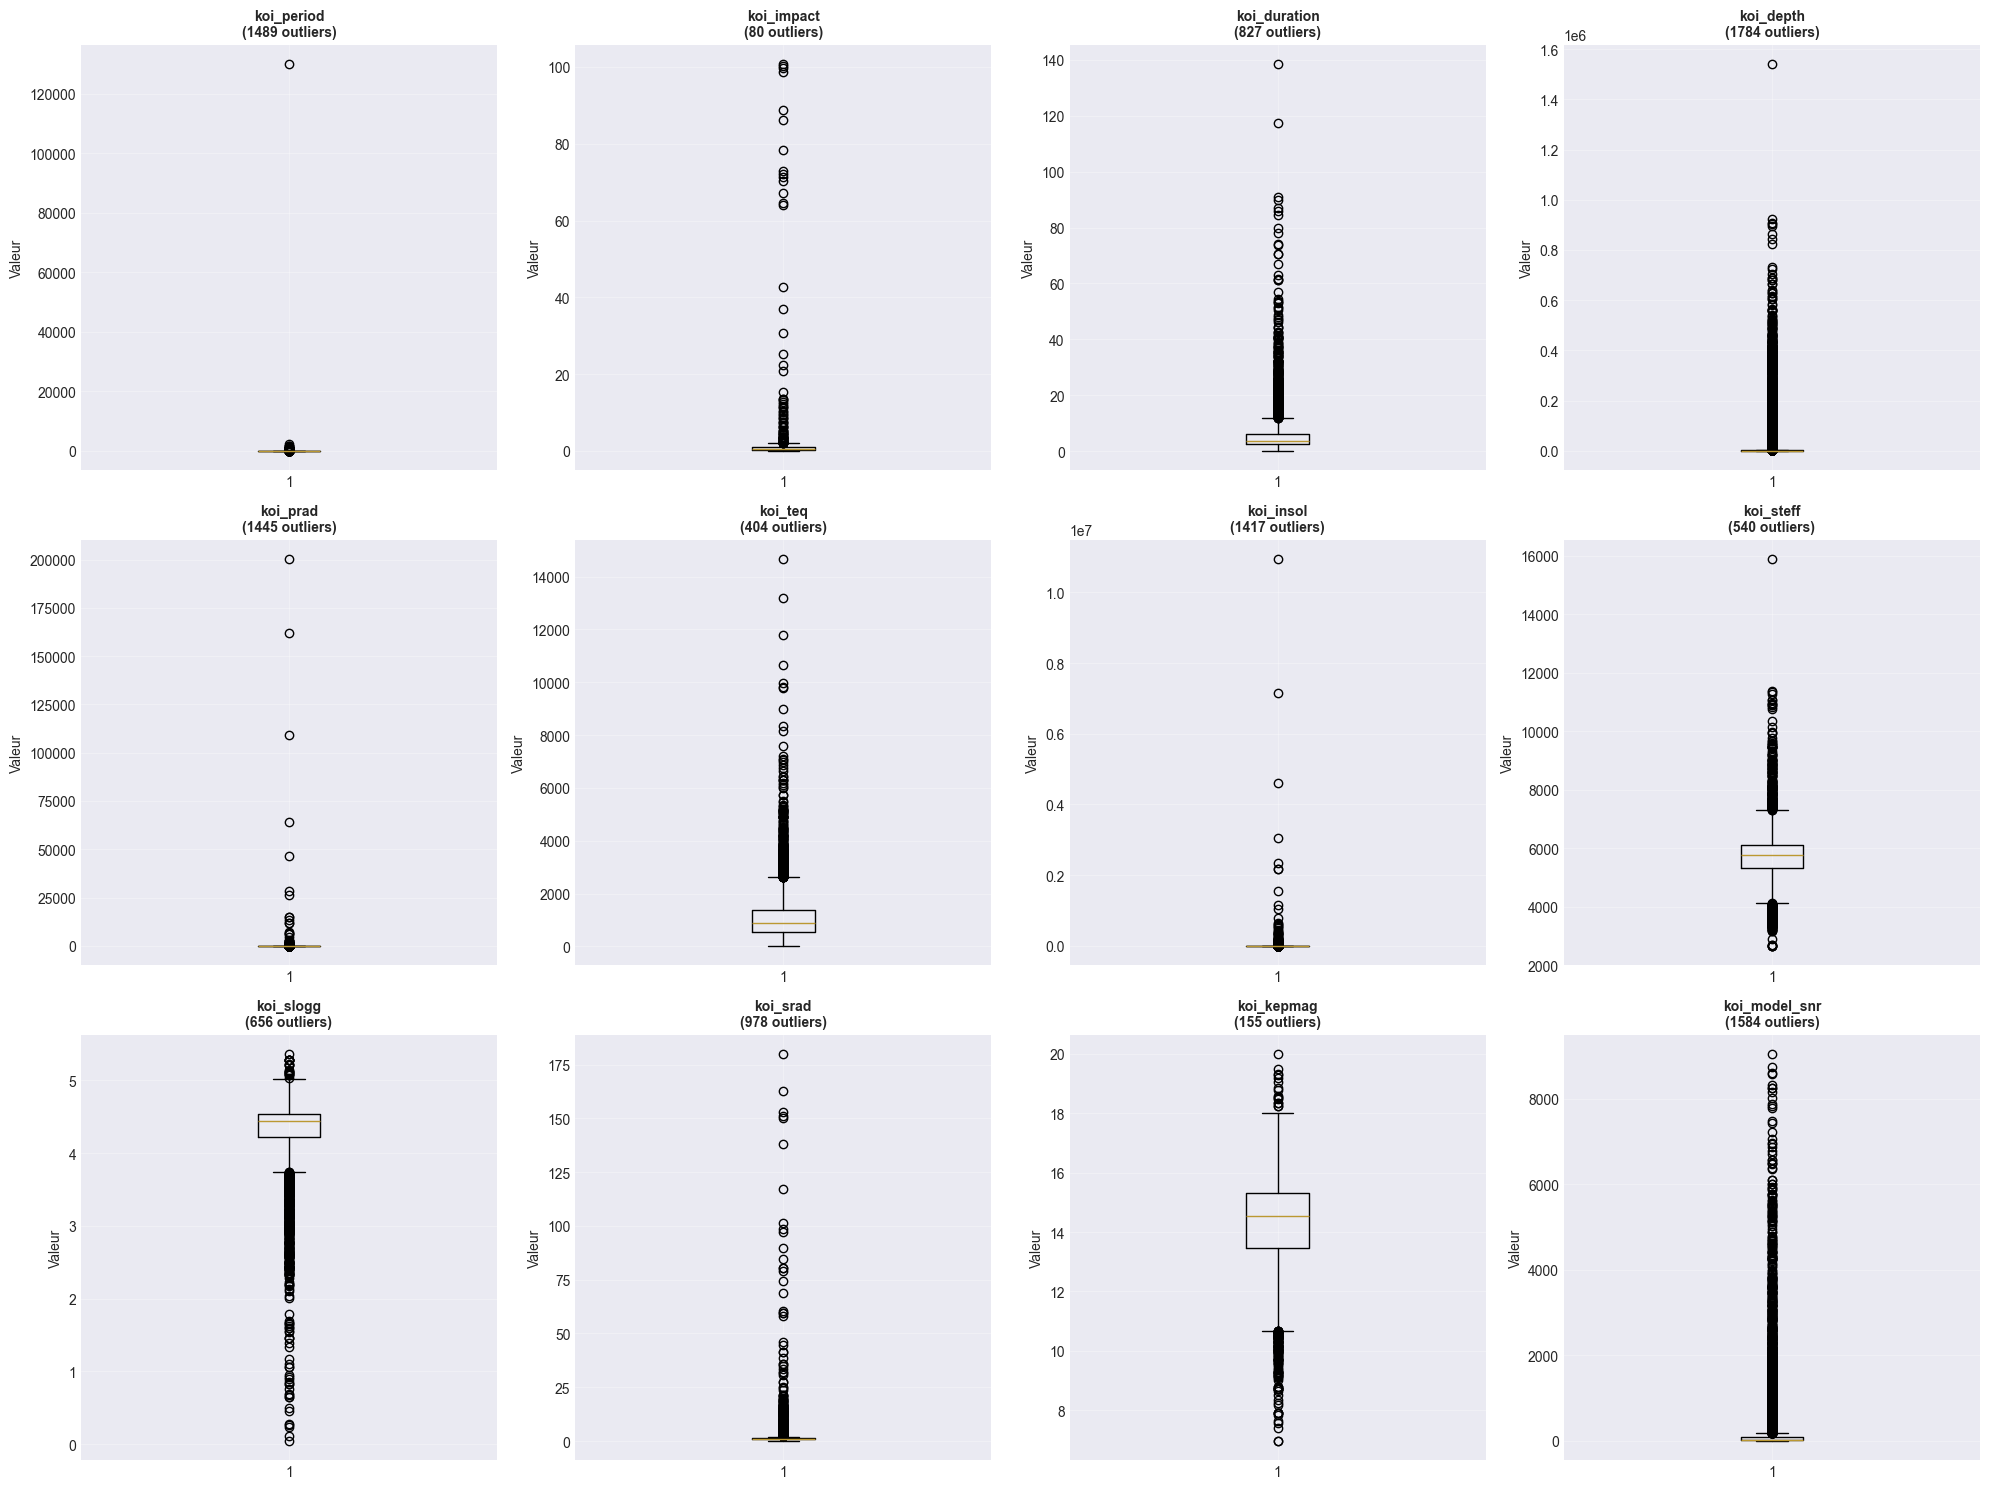

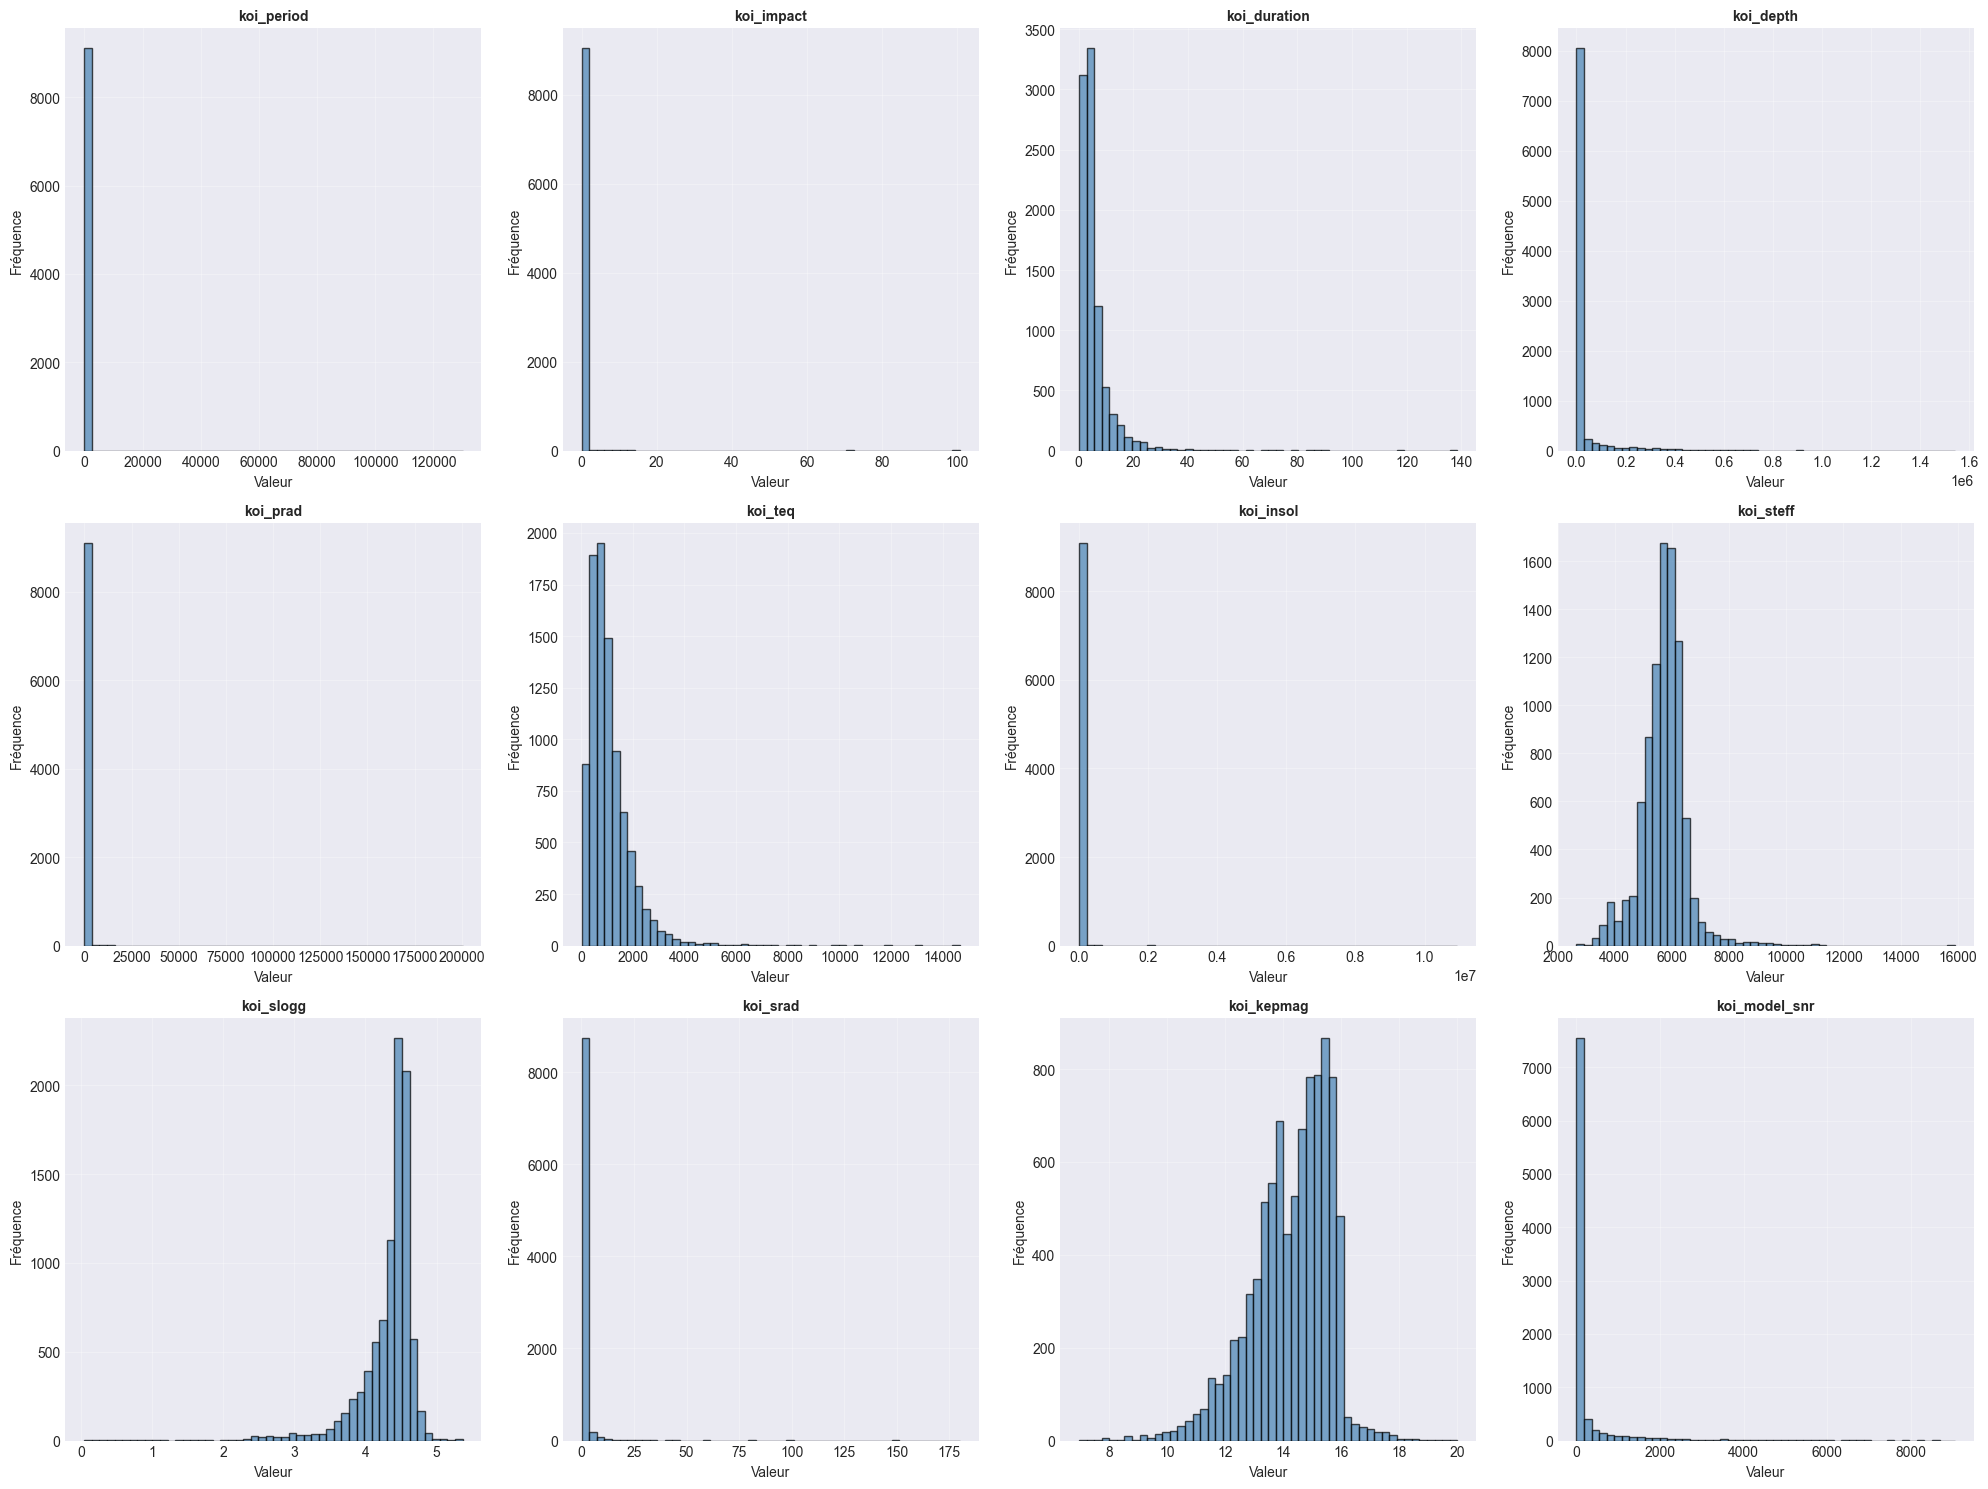

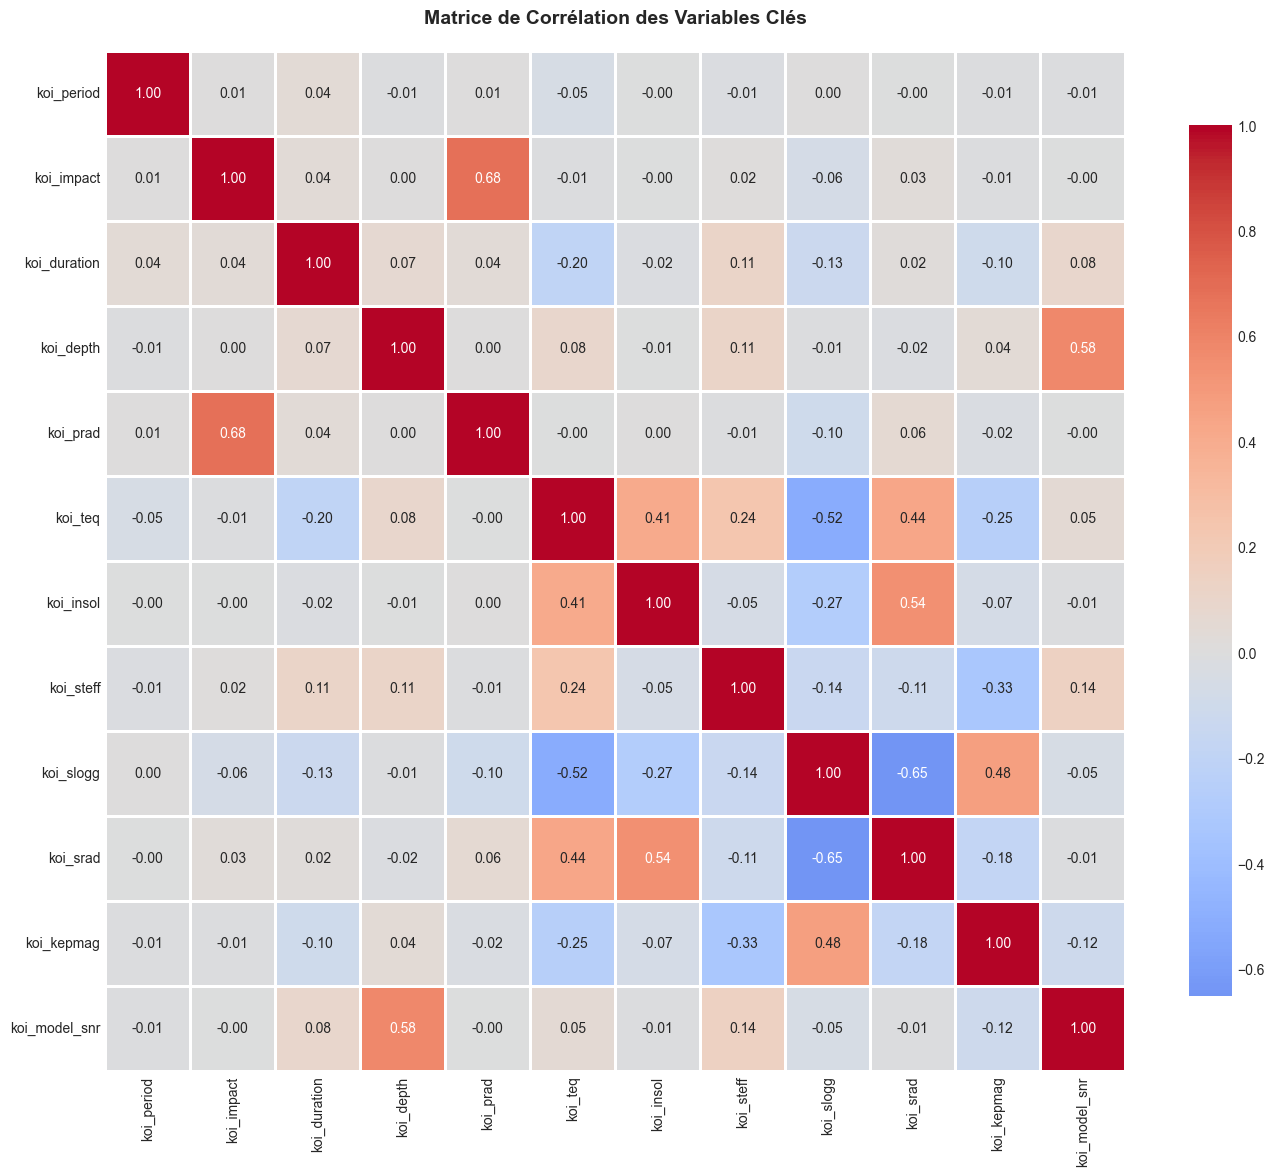

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Configuration pour de meilleurs graphiques
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Charger le dataset nettoyé
file_path = "C:/Users/chaym/Desktop/NasaProject/data/processed/Kepler_cleaned.csv"
df = pd.read_csv(file_path)

print(f"{'='*70}")
print(f"ANALYSE DES OUTLIERS - DATASET KEPLER")
print(f"{'='*70}")
print(f"Dimensions du dataset: {df.shape}\n")

# Sélectionner uniquement les colonnes numériques
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# Exclure les colonnes d'identifiant
exclude_cols = ['kepid']
numeric_cols = [col for col in numeric_cols if col not in exclude_cols]

print(f"Nombre de colonnes numériques analysées: {len(numeric_cols)}\n")

# ==========================================
# 1. MÉTHODE IQR (Interquartile Range)
# ==========================================
print(f"{'='*70}")
print(f"1. DÉTECTION DES OUTLIERS PAR MÉTHODE IQR")
print(f"{'='*70}\n")

outliers_iqr = {}
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outliers_iqr[col] = len(outliers)
    
    if len(outliers) > 0:
        percentage = (len(outliers) / len(df)) * 100
        print(f"{col}:")
        print(f"  - Q1: {Q1:.4f}, Q3: {Q3:.4f}, IQR: {IQR:.4f}")
        print(f"  - Limites: [{lower_bound:.4f}, {upper_bound:.4f}]")
        print(f"  - Outliers: {len(outliers)} ({percentage:.2f}%)")
        print(f"  - Min: {df[col].min():.4f}, Max: {df[col].max():.4f}\n")

# ==========================================
# 2. MÉTHODE Z-SCORE
# ==========================================
print(f"\n{'='*70}")
print(f"2. DÉTECTION DES OUTLIERS PAR Z-SCORE (|Z| > 3)")
print(f"{'='*70}\n")

outliers_zscore = {}
for col in numeric_cols:
    z_scores = np.abs(stats.zscore(df[col], nan_policy='omit'))
    outliers = df[z_scores > 3]
    outliers_zscore[col] = len(outliers)
    
    if len(outliers) > 0:
        percentage = (len(outliers) / len(df)) * 100
        print(f"{col}:")
        print(f"  - Outliers: {len(outliers)} ({percentage:.2f}%)")
        print(f"  - Z-score max: {z_scores.max():.2f}\n")

# ==========================================
# 3. RÉSUMÉ STATISTIQUE
# ==========================================
print(f"\n{'='*70}")
print(f"3. STATISTIQUES DESCRIPTIVES")
print(f"{'='*70}\n")

summary = df[numeric_cols].describe()
print(summary)

# ==========================================
# 4. VISUALISATIONS
# ==========================================
print(f"\n{'='*70}")
print(f"4. GÉNÉRATION DES VISUALISATIONS")
print(f"{'='*70}\n")

# Sélectionner les colonnes les plus importantes pour la visualisation
key_columns = [
    'koi_period', 'koi_impact', 'koi_duration', 'koi_depth', 
    'koi_prad', 'koi_teq', 'koi_insol', 'koi_steff', 
    'koi_slogg', 'koi_srad', 'koi_kepmag', 'koi_model_snr'
]

# Filtrer les colonnes qui existent dans le dataset
key_columns = [col for col in key_columns if col in numeric_cols]

# Créer les boxplots
n_cols = 4
n_rows = int(np.ceil(len(key_columns) / n_cols))

fig1, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5*n_rows))
axes = axes.flatten()

for idx, col in enumerate(key_columns):
    axes[idx].boxplot(df[col].dropna(), vert=True)
    axes[idx].set_title(f'{col}\n({outliers_iqr[col]} outliers)', fontsize=10, fontweight='bold')
    axes[idx].set_ylabel('Valeur')
    axes[idx].grid(True, alpha=0.3)

# Masquer les axes vides
for idx in range(len(key_columns), len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.savefig('C:/Users/chaym/Desktop/NasaProject/data/processed/outliers_boxplots.png', dpi=300, bbox_inches='tight')
print("✓ Boxplots sauvegardés: outliers_boxplots.png")

# Créer les histogrammes avec distribution normale
fig2, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5*n_rows))
axes = axes.flatten()

for idx, col in enumerate(key_columns):
    data = df[col].dropna()
    axes[idx].hist(data, bins=50, alpha=0.7, color='steelblue', edgecolor='black')
    axes[idx].set_title(f'{col}', fontsize=10, fontweight='bold')
    axes[idx].set_xlabel('Valeur')
    axes[idx].set_ylabel('Fréquence')
    axes[idx].grid(True, alpha=0.3)

# Masquer les axes vides
for idx in range(len(key_columns), len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.savefig('C:/Users/chaym/Desktop/NasaProject/data/processed/outliers_histograms.png', dpi=300, bbox_inches='tight')
print("✓ Histogrammes sauvegardés: outliers_histograms.png")

# Créer un heatmap des corrélations
fig3, ax = plt.subplots(figsize=(14, 12))
correlation_matrix = df[key_columns].corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8}, ax=ax)
plt.title('Matrice de Corrélation des Variables Clés', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig('C:/Users/chaym/Desktop/NasaProject/data/processed/outliers_correlation.png', dpi=300, bbox_inches='tight')
print("✓ Matrice de corrélation sauvegardée: outliers_correlation.png")

# ==========================================
# 5. RAPPORT RÉCAPITULATIF
# ==========================================
print(f"\n{'='*70}")
print(f"5. RAPPORT RÉCAPITULATIF DES OUTLIERS")
print(f"{'='*70}\n")

# Créer un DataFrame récapitulatif
recap_data = []
for col in numeric_cols:
    recap_data.append({
        'Colonne': col,
        'Outliers IQR': outliers_iqr[col],
        'Outliers Z-Score': outliers_zscore[col],
        '% IQR': f"{(outliers_iqr[col]/len(df)*100):.2f}%",
        '% Z-Score': f"{(outliers_zscore[col]/len(df)*100):.2f}%"
    })

recap_df = pd.DataFrame(recap_data)
recap_df = recap_df.sort_values('Outliers IQR', ascending=False)

print(recap_df.to_string(index=False))

# Sauvegarder le rapport
recap_df.to_csv('C:/Users/chaym/Desktop/NasaProject/data/processed/outliers_report.csv', index=False)
print(f"\n✓ Rapport sauvegardé: outliers_report.csv")

# Afficher les colonnes avec le plus d'outliers
print(f"\n{'='*70}")
print(f"TOP 10 DES COLONNES AVEC LE PLUS D'OUTLIERS (IQR)")
print(f"{'='*70}\n")
print(recap_df.head(10).to_string(index=False))

print(f"\n{'='*70}")
print(f"ANALYSE TERMINÉE")
print(f"{'='*70}")
print(f"\nFichiers générés:")
print(f"  1. outliers_boxplots.png - Boîtes à moustaches")
print(f"  2. outliers_histograms.png - Distributions")
print(f"  3. outliers_correlation.png - Matrice de corrélation")
print(f"  4. outliers_report.csv - Rapport détaillé")

TRAITEMENT DES OUTLIERS - DATASET KEPLER
Dimensions initiales: (9110, 33)

STRATÉGIE DE TRAITEMENT

CAP_IQR:
  Description: Winsorisation (IQR) - Limiter aux limites IQR
  Colonnes concernées: 10
  koi_period, koi_duration, koi_depth, koi_prad, koi_teq...

CAP_PERCENTILE:
  Description: Winsorisation (Percentiles) - Limiter à 1er et 99e percentile
  Colonnes concernées: 10
  koi_period_err1, koi_period_err2, koi_duration_err1, koi_duration_err2, koi_depth_err1...

LOG_TRANSFORM:
  Description: Transformation logarithmique - Pour distributions très asymétriques
  Colonnes concernées: 0
  

KEEP_EXTREME:
  Description: Garder les valeurs - Variables physiquement justifiées
  Colonnes concernées: 10
  koi_impact, koi_impact_err1, koi_impact_err2, koi_slogg, koi_slogg_err1...


MÉTHODE 1: WINSORISATION PAR IQR (Capping)

koi_period: 1489 valeurs limitées à [-48.9179, 88.7212]
koi_duration: 827 valeurs limitées à [-3.2911, 12.0332]
koi_depth: 1784 valeurs limitées à [-1833.2125, 3485.8875]


C:\Users\chaym\AppData\Local\Temp\ipykernel_10908\3572658468.py:234: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[idx].boxplot([df_original[col].dropna(), df[col].dropna()],
C:\Users\chaym\AppData\Local\Temp\ipykernel_10908\3572658468.py:234: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[idx].boxplot([df_original[col].dropna(), df[col].dropna()],
C:\Users\chaym\AppData\Local\Temp\ipykernel_10908\3572658468.py:234: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[idx].boxplot([df_original[col].dropna(), df[col].dropna()],
C:\Users\chaym\AppData\Local\Temp\ipykernel_10908\3572658468.py:234: MatplotlibDeprec

✓ Comparaison avant/après sauvegardée: outliers_treatment_comparison.png
✓ Distributions log-transformées sauvegardées: outliers_log_distributions.png

SAUVEGARDE DES DATASETS TRAITÉS

✓ Dataset avec winsorisation: Kepler_winsorized.csv
  Dimensions: (9110, 36)
✓ Dataset sans outliers extrêmes: Kepler_no_extreme.csv
  Dimensions: (9110, 36)
TRAITEMENT TERMINÉ


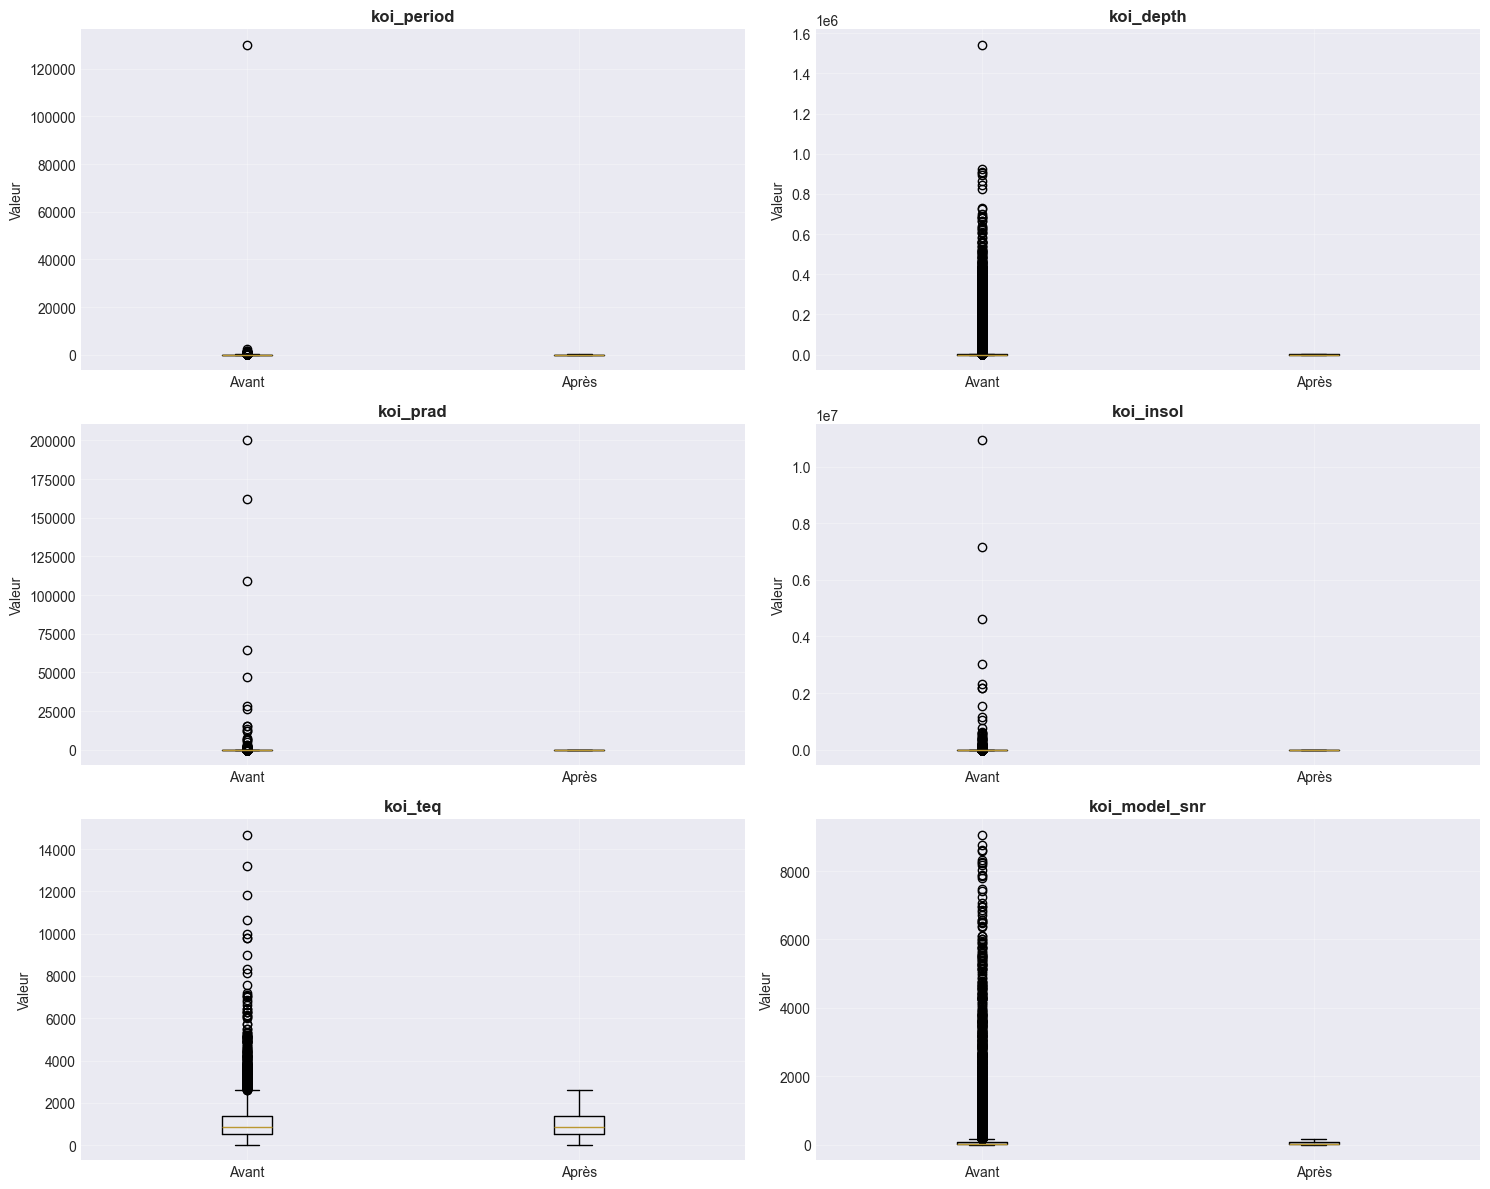

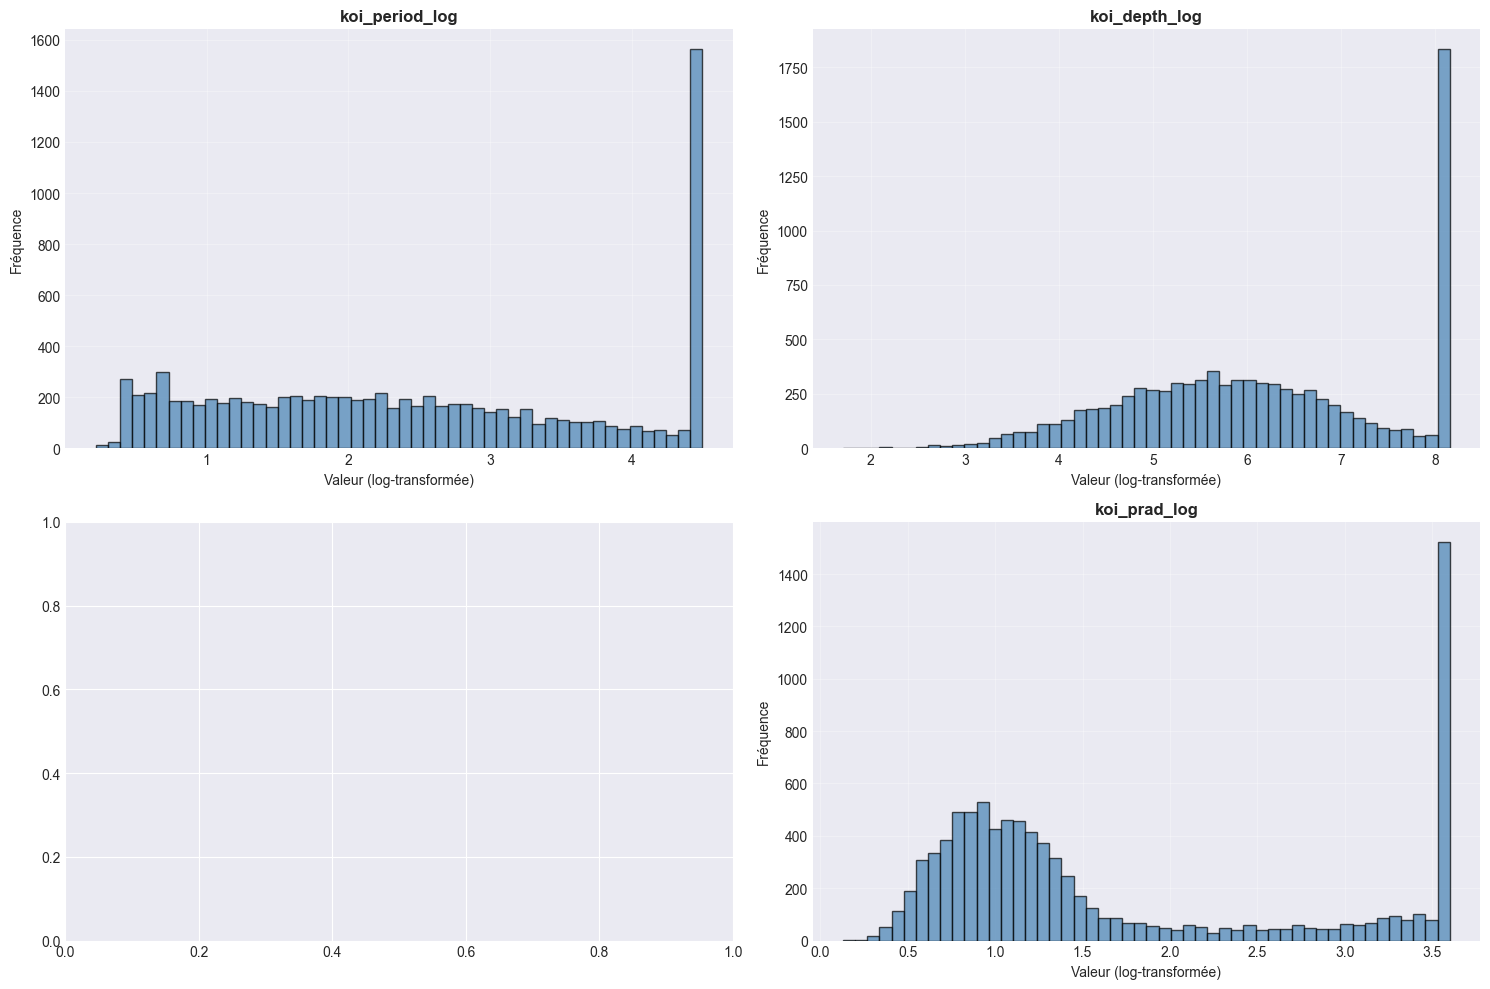

In [4]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.preprocessing import RobustScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Charger le dataset
file_path = "C:/Users/chaym/Desktop/NasaProject/data/processed/Kepler_cleaned.csv"
df = pd.read_csv(file_path)

print(f"{'='*80}")
print(f"TRAITEMENT DES OUTLIERS - DATASET KEPLER")
print(f"{'='*80}")
print(f"Dimensions initiales: {df.shape}\n")

# Créer une copie pour comparaison
df_original = df.copy()

# ================================================================================
# STRATÉGIE DE TRAITEMENT DES OUTLIERS
# ================================================================================

print(f"{'='*80}")
print(f"STRATÉGIE DE TRAITEMENT")
print(f"{'='*80}\n")

# Définir les colonnes par catégorie et méthode de traitement
treatment_strategy = {
    'cap_iqr': {
        'description': 'Winsorisation (IQR) - Limiter aux limites IQR',
        'columns': [
            'koi_period', 'koi_duration', 'koi_depth', 
            'koi_prad', 'koi_teq', 'koi_insol', 'koi_model_snr',
            'koi_steff', 'koi_srad', 'koi_kepmag'
        ]
    },
    'cap_percentile': {
        'description': 'Winsorisation (Percentiles) - Limiter à 1er et 99e percentile',
        'columns': [
            'koi_period_err1', 'koi_period_err2',
            'koi_duration_err1', 'koi_duration_err2',
            'koi_depth_err1', 'koi_depth_err2',
            'koi_prad_err1', 'koi_prad_err2',
            'koi_insol_err1', 'koi_insol_err2'
        ]
    },
    'log_transform': {
        'description': 'Transformation logarithmique - Pour distributions très asymétriques',
        'columns': []  # Appliqué après analyse
    },
    'keep_extreme': {
        'description': 'Garder les valeurs - Variables physiquement justifiées',
        'columns': [
            'koi_impact', 'koi_impact_err1', 'koi_impact_err2',
            'koi_slogg', 'koi_slogg_err1', 'koi_slogg_err2',
            'koi_steff_err1', 'koi_steff_err2',
            'koi_srad_err1', 'koi_srad_err2'
        ]
    }
}

for method, info in treatment_strategy.items():
    print(f"{method.upper()}:")
    print(f"  Description: {info['description']}")
    print(f"  Colonnes concernées: {len(info['columns'])}")
    print(f"  {', '.join(info['columns'][:5])}{'...' if len(info['columns']) > 5 else ''}\n")

# ================================================================================
# MÉTHODE 1: WINSORISATION PAR IQR
# ================================================================================

print(f"\n{'='*80}")
print(f"MÉTHODE 1: WINSORISATION PAR IQR (Capping)")
print(f"{'='*80}\n")

outliers_capped_iqr = {}
for col in treatment_strategy['cap_iqr']['columns']:
    if col in df.columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Compter les outliers avant traitement
        outliers_before = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()
        
        # Appliquer le capping
        df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)
        
        outliers_capped_iqr[col] = outliers_before
        if outliers_before > 0:
            print(f"{col}: {outliers_before} valeurs limitées à [{lower_bound:.4f}, {upper_bound:.4f}]")

# ================================================================================
# MÉTHODE 2: WINSORISATION PAR PERCENTILES (1%-99%)
# ================================================================================

print(f"\n{'='*80}")
print(f"MÉTHODE 2: WINSORISATION PAR PERCENTILES (1%-99%)")
print(f"{'='*80}\n")

outliers_capped_pct = {}
for col in treatment_strategy['cap_percentile']['columns']:
    if col in df.columns:
        p1 = df[col].quantile(0.01)
        p99 = df[col].quantile(0.99)
        
        # Compter les outliers avant traitement
        outliers_before = ((df[col] < p1) | (df[col] > p99)).sum()
        
        # Appliquer le capping
        df[col] = df[col].clip(lower=p1, upper=p99)
        
        outliers_capped_pct[col] = outliers_before
        if outliers_before > 0:
            print(f"{col}: {outliers_before} valeurs limitées à [{p1:.6f}, {p99:.6f}]")

# ================================================================================
# MÉTHODE 3: TRANSFORMATION LOGARITHMIQUE (pour colonnes très asymétriques)
# ================================================================================

print(f"\n{'='*80}")
print(f"MÉTHODE 3: TRANSFORMATION LOGARITHMIQUE")
print(f"{'='*80}\n")

# Identifier les colonnes avec forte asymétrie (skewness > 3)
log_transform_candidates = []
for col in df.select_dtypes(include=[np.number]).columns:
    if col not in ['kepid'] and df[col].min() > 0:  # Uniquement valeurs positives
        skewness = df[col].skew()
        if abs(skewness) > 3:
            log_transform_candidates.append((col, skewness))

log_transform_candidates.sort(key=lambda x: abs(x[1]), reverse=True)

print("Colonnes avec forte asymétrie (|skewness| > 3):")
for col, skew in log_transform_candidates[:10]:
    print(f"  {col}: skewness = {skew:.2f}")

# Créer de nouvelles colonnes log-transformées pour les principales variables
log_columns = ['koi_period', 'koi_depth', 'koi_insol', 'koi_prad']
print(f"\nCréation de colonnes log-transformées:")
for col in log_columns:
    if col in df.columns and df[col].min() > 0:
        df[f'{col}_log'] = np.log1p(df[col])  # log1p pour éviter log(0)
        print(f"  ✓ {col}_log créée (log1p transformation)")

# ================================================================================
# MÉTHODE 4: ANALYSE DES VALEURS EXTRÊMES À CONSERVER
# ================================================================================

print(f"\n{'='*80}")
print(f"MÉTHODE 4: VALEURS EXTRÊMES CONSERVÉES")
print(f"{'='*80}\n")

print("Les colonnes suivantes conservent leurs valeurs extrêmes car:")
print("- Elles représentent des incertitudes de mesure (erreurs)")
print("- Les valeurs extrêmes peuvent être physiquement justifiées")
print("- Elles seront standardisées lors de la modélisation\n")

for col in treatment_strategy['keep_extreme']['columns'][:5]:
    if col in df.columns:
        print(f"  {col}: Min={df[col].min():.4f}, Max={df[col].max():.4f}")

# ================================================================================
# OPTION ALTERNATIVE: SUPPRESSION DES OUTLIERS EXTRÊMES
# ================================================================================

print(f"\n{'='*80}")
print(f"OPTION ALTERNATIVE: SUPPRESSION DES OUTLIERS EXTRÊMES (Z-SCORE)")
print(f"{'='*80}\n")

# Créer une version avec suppression des outliers extrêmes (|Z| > 4)
df_no_extreme = df.copy()

key_columns = ['koi_period', 'koi_depth', 'koi_prad', 'koi_insol']
rows_before = len(df_no_extreme)

for col in key_columns:
    if col in df_no_extreme.columns:
        z_scores = np.abs(stats.zscore(df_no_extreme[col]))
        df_no_extreme = df_no_extreme[z_scores < 4]

rows_after = len(df_no_extreme)
print(f"Suppression des outliers extrêmes (|Z| > 4):")
print(f"  - Lignes supprimées: {rows_before - rows_after}")
print(f"  - Lignes restantes: {rows_after} ({(rows_after/rows_before)*100:.2f}%)")

# ================================================================================
# COMPARAISON AVANT/APRÈS
# ================================================================================

print(f"\n{'='*80}")
print(f"COMPARAISON STATISTIQUES AVANT/APRÈS TRAITEMENT")
print(f"{'='*80}\n")

comparison_cols = ['koi_period', 'koi_depth', 'koi_prad', 'koi_insol', 'koi_teq']
comparison_data = []

for col in comparison_cols:
    if col in df.columns:
        comparison_data.append({
            'Colonne': col,
            'Min Avant': f"{df_original[col].min():.2f}",
            'Min Après': f"{df[col].min():.2f}",
            'Max Avant': f"{df_original[col].max():.2f}",
            'Max Après': f"{df[col].max():.2f}",
            'Médiane Avant': f"{df_original[col].median():.2f}",
            'Médiane Après': f"{df[col].median():.2f}"
        })

comparison_df = pd.DataFrame(comparison_data)
print(comparison_df.to_string(index=False))

# ================================================================================
# VISUALISATIONS
# ================================================================================

print(f"\n{'='*80}")
print(f"GÉNÉRATION DES VISUALISATIONS")
print(f"{'='*80}\n")

# Comparaison avant/après pour les colonnes clés
fig, axes = plt.subplots(3, 2, figsize=(15, 12))
axes = axes.flatten()

comparison_visual_cols = ['koi_period', 'koi_depth', 'koi_prad', 'koi_insol', 'koi_teq', 'koi_model_snr']

for idx, col in enumerate(comparison_visual_cols):
    if col in df.columns:
        axes[idx].boxplot([df_original[col].dropna(), df[col].dropna()], 
                         labels=['Avant', 'Après'])
        axes[idx].set_title(f'{col}', fontweight='bold')
        axes[idx].set_ylabel('Valeur')
        axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('C:/Users/chaym/Desktop/NasaProject/data/processed/outliers_treatment_comparison.png', 
            dpi=300, bbox_inches='tight')
print("✓ Comparaison avant/après sauvegardée: outliers_treatment_comparison.png")

# Distribution des colonnes log-transformées
fig2, axes2 = plt.subplots(2, 2, figsize=(15, 10))
axes2 = axes2.flatten()

for idx, col in enumerate(log_columns):
    log_col = f'{col}_log'
    if log_col in df.columns:
        axes2[idx].hist(df[log_col].dropna(), bins=50, alpha=0.7, color='steelblue', edgecolor='black')
        axes2[idx].set_title(f'{log_col}', fontweight='bold')
        axes2[idx].set_xlabel('Valeur (log-transformée)')
        axes2[idx].set_ylabel('Fréquence')
        axes2[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('C:/Users/chaym/Desktop/NasaProject/data/processed/outliers_log_distributions.png', 
            dpi=300, bbox_inches='tight')
print("✓ Distributions log-transformées sauvegardées: outliers_log_distributions.png")

# ================================================================================
# SAUVEGARDER LES DATASETS
# ================================================================================

print(f"\n{'='*80}")
print(f"SAUVEGARDE DES DATASETS TRAITÉS")
print(f"{'='*80}\n")

# Dataset avec winsorisation
output_path1 = "C:/Users/chaym/Desktop/NasaProject/data/processed/Kepler_winsorized.csv"
df.to_csv(output_path1, index=False)
print(f"✓ Dataset avec winsorisation: Kepler_winsorized.csv")
print(f"  Dimensions: {df.shape}")

# Dataset avec suppression des extrêmes
output_path2 = "C:/Users/chaym/Desktop/NasaProject/data/processed/Kepler_no_extreme.csv"
df_no_extreme.to_csv(output_path2, index=False)
print(f"✓ Dataset sans outliers extrêmes: Kepler_no_extreme.csv")
print(f"  Dimensions: {df_no_extreme.shape}")


print(f"{'='*80}")
print(f"TRAITEMENT TERMINÉ")
print(f"{'='*80}")

ÉTAPE 1 - ANALYSE DE LA VARIABLE CIBLE (koi_disposition)

Dimensions du dataset: (9110, 36)
Colonnes: 36
Observations: 9110

1. DISTRIBUTION DES CLASSES

Nombre d'observations par classe:
koi_disposition
FALSE POSITIVE    4506
CONFIRMED         2741
CANDIDATE         1863
Name: count, dtype: int64

Pourcentages par classe:
  FALSE POSITIVE: 49.46%
  CONFIRMED: 30.09%
  CANDIDATE: 20.45%

2. ANALYSE DU DÉSÉQUILIBRE DES CLASSES

Ratio de déséquilibre: 2.42
Classe majoritaire: FALSE POSITIVE (4506 obs)
Classe minoritaire: CANDIDATE (1863 obs)

⚠️  Léger déséquilibre - Techniques de base suffisantes

3. VISUALISATIONS

✓ Graphiques sauvegardés: step1_target_analysis.png

4. STATISTIQUES SUPPLÉMENTAIRES

Valeurs manquantes dans koi_disposition: 0
✓ Toutes les observations ont un label

Nombre de classes uniques: 3
Classes: ['CONFIRMED', 'CANDIDATE', 'FALSE POSITIVE']

5. RECOMMANDATIONS POUR LA MODÉLISATION

💡 Recommandations:
  → Utiliser stratify=y lors du train_test_split
  → Considérer 

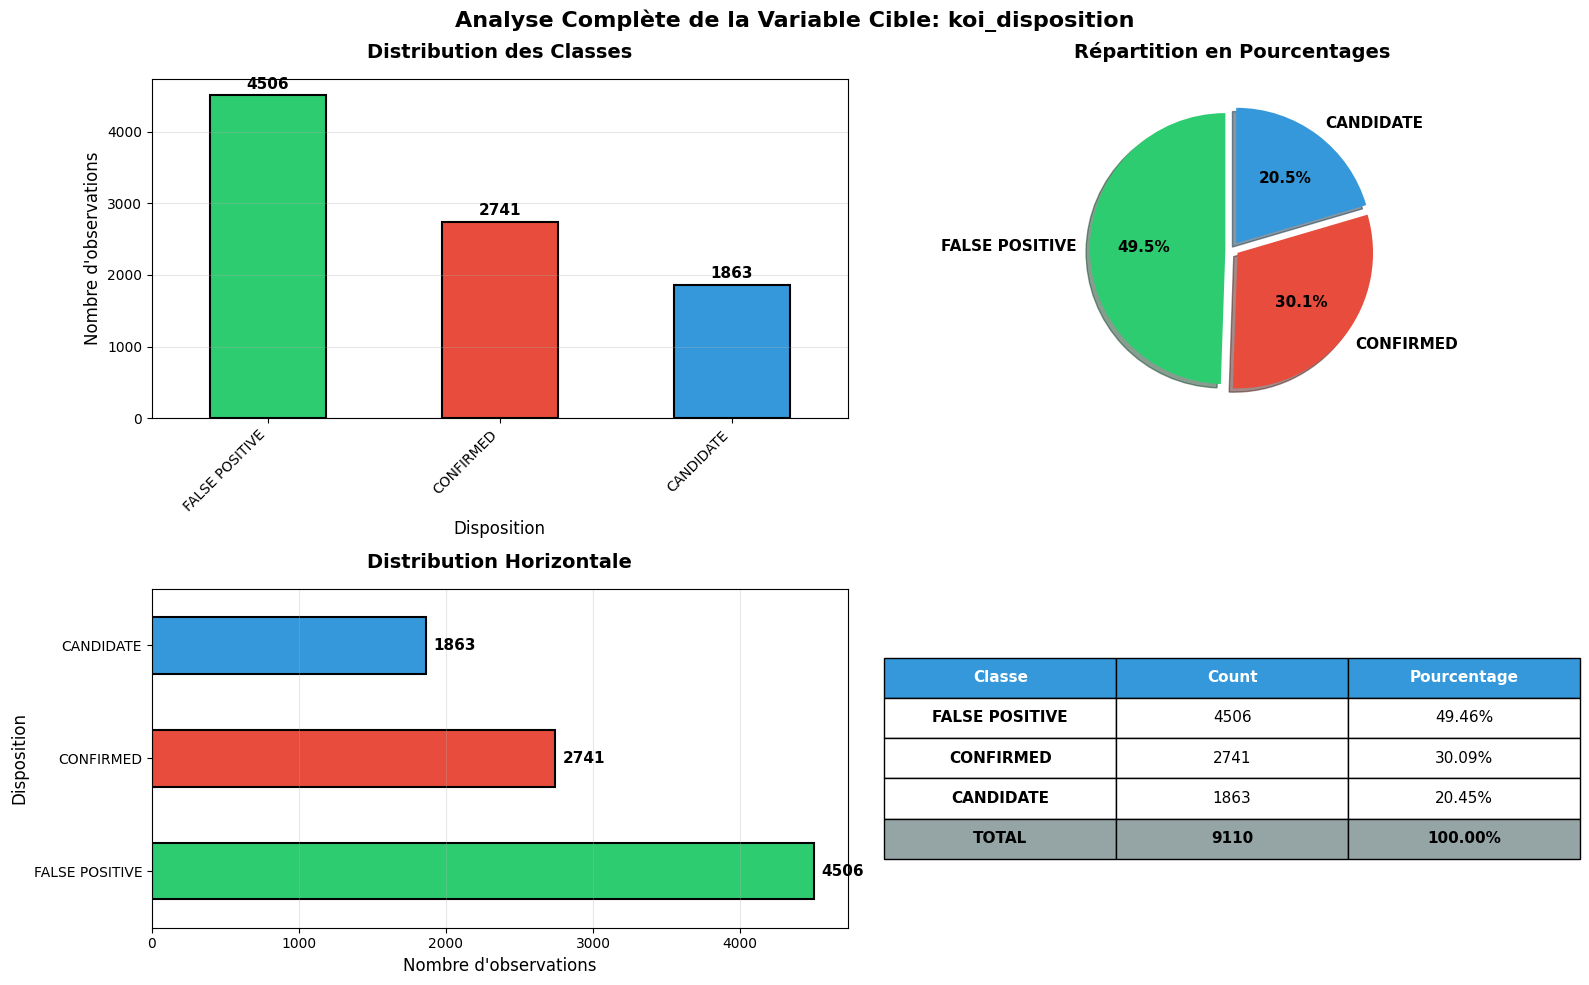

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Charger le dataset
file_path = "C:/Users/chaym/Desktop/NasaProject/data/processed/Kepler_winsorized.csv"
df = pd.read_csv(file_path)

print(f"{'='*80}")
print(f"ÉTAPE 1 - ANALYSE DE LA VARIABLE CIBLE (koi_disposition)")
print(f"{'='*80}\n")

print(f"Dimensions du dataset: {df.shape}")
print(f"Colonnes: {df.shape[1]}")
print(f"Observations: {df.shape[0]}\n")

# ================================================================================
# 1. DISTRIBUTION DES CLASSES
# ================================================================================

print(f"{'='*80}")
print(f"1. DISTRIBUTION DES CLASSES")
print(f"{'='*80}\n")

# Comptage des classes
class_counts = df['koi_disposition'].value_counts()
print("Nombre d'observations par classe:")
print(class_counts)
print()

# Pourcentages
class_percentages = df['koi_disposition'].value_counts(normalize=True) * 100
print("Pourcentages par classe:")
for classe, pourcentage in class_percentages.items():
    print(f"  {classe}: {pourcentage:.2f}%")

# ================================================================================
# 2. CALCUL DU DÉSÉQUILIBRE
# ================================================================================

print(f"\n{'='*80}")
print(f"2. ANALYSE DU DÉSÉQUILIBRE DES CLASSES")
print(f"{'='*80}\n")

# Ratio de déséquilibre (classe majoritaire / classe minoritaire)
imbalance_ratio = class_counts.max() / class_counts.min()
print(f"Ratio de déséquilibre: {imbalance_ratio:.2f}")
print(f"Classe majoritaire: {class_counts.idxmax()} ({class_counts.max()} obs)")
print(f"Classe minoritaire: {class_counts.idxmin()} ({class_counts.min()} obs)")

# Évaluation du niveau de déséquilibre
if imbalance_ratio < 1.5:
    print("\n✓ Dataset bien équilibré")
elif imbalance_ratio < 3:
    print("\n⚠️  Léger déséquilibre - Techniques de base suffisantes")
elif imbalance_ratio < 10:
    print("\n⚠️  Déséquilibre modéré - Utiliser class_weight ou SMOTE")
else:
    print("\n❌ Déséquilibre sévère - Techniques avancées nécessaires")

# ================================================================================
# 3. VISUALISATIONS
# ================================================================================

print(f"\n{'='*80}")
print(f"3. VISUALISATIONS")
print(f"{'='*80}\n")

# Créer une figure avec plusieurs graphiques
fig = plt.figure(figsize=(16, 10))

# 3.1 Graphique en barres
ax1 = plt.subplot(2, 2, 1)
colors = ['#2ecc71', '#e74c3c', '#3498db']
class_counts.plot(kind='bar', color=colors, edgecolor='black', linewidth=1.5)
plt.title('Distribution des Classes', fontsize=14, fontweight='bold', pad=15)
plt.xlabel('Disposition', fontsize=12)
plt.ylabel('Nombre d\'observations', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3, axis='y')

# Ajouter les valeurs sur les barres
for i, v in enumerate(class_counts.values):
    plt.text(i, v + 50, str(v), ha='center', va='bottom', fontweight='bold', fontsize=11)

# 3.2 Graphique en camembert
ax2 = plt.subplot(2, 2, 2)
plt.pie(class_counts.values, labels=class_counts.index, autopct='%1.1f%%',
        colors=colors, startangle=90, textprops={'fontsize': 11, 'fontweight': 'bold'},
        explode=(0.05, 0.05, 0.05), shadow=True)
plt.title('Répartition en Pourcentages', fontsize=14, fontweight='bold', pad=15)

# 3.3 Graphique horizontal pour mieux voir les noms
ax3 = plt.subplot(2, 2, 3)
class_counts.plot(kind='barh', color=colors, edgecolor='black', linewidth=1.5)
plt.title('Distribution Horizontale', fontsize=14, fontweight='bold', pad=15)
plt.xlabel('Nombre d\'observations', fontsize=12)
plt.ylabel('Disposition', fontsize=12)
plt.grid(True, alpha=0.3, axis='x')

# Ajouter les valeurs sur les barres
for i, v in enumerate(class_counts.values):
    plt.text(v + 50, i, str(v), ha='left', va='center', fontweight='bold', fontsize=11)

# 3.4 Tableau récapitulatif
ax4 = plt.subplot(2, 2, 4)
ax4.axis('tight')
ax4.axis('off')

# Créer les données du tableau
table_data = []
for classe in class_counts.index:
    count = class_counts[classe]
    percentage = class_percentages[classe]
    table_data.append([classe, count, f"{percentage:.2f}%"])

# Ajouter une ligne totale
table_data.append(['TOTAL', class_counts.sum(), '100.00%'])

# Créer le tableau
table = ax4.table(cellText=table_data,
                  colLabels=['Classe', 'Count', 'Pourcentage'],
                  cellLoc='center',
                  loc='center',
                  colColours=['#f0f0f0']*3)

table.auto_set_font_size(False)
table.set_fontsize(11)
table.scale(1, 2.5)

# Style du tableau
for i in range(len(table_data) + 1):
    for j in range(3):
        cell = table[(i, j)]
        if i == 0:  # Header
            cell.set_facecolor('#3498db')
            cell.set_text_props(weight='bold', color='white')
        elif i == len(table_data):  # Dernière ligne (TOTAL)
            cell.set_facecolor('#95a5a6')
            cell.set_text_props(weight='bold')
        else:
            if j == 0:  # Première colonne
                cell.set_text_props(weight='bold')

plt.suptitle('Analyse Complète de la Variable Cible: koi_disposition', 
             fontsize=16, fontweight='bold', y=0.98)
plt.tight_layout()
plt.savefig('C:/Users/chaym/Desktop/NasaProject/data/processed/step1_target_analysis.png', 
            dpi=300, bbox_inches='tight')

print("✓ Graphiques sauvegardés: step1_target_analysis.png")

# ================================================================================
# 4. STATISTIQUES SUPPLÉMENTAIRES
# ================================================================================

print(f"\n{'='*80}")
print(f"4. STATISTIQUES SUPPLÉMENTAIRES")
print(f"{'='*80}\n")

# Vérifier les valeurs manquantes dans la cible
missing_target = df['koi_disposition'].isnull().sum()
print(f"Valeurs manquantes dans koi_disposition: {missing_target}")

if missing_target > 0:
    print(f"⚠️  Attention: {missing_target} observations sans label")
else:
    print("✓ Toutes les observations ont un label")

# Valeurs uniques
print(f"\nNombre de classes uniques: {df['koi_disposition'].nunique()}")
print(f"Classes: {df['koi_disposition'].unique().tolist()}")

# ================================================================================
# 5. RECOMMANDATIONS
# ================================================================================

print(f"\n{'='*80}")
print(f"5. RECOMMANDATIONS POUR LA MODÉLISATION")
print(f"{'='*80}\n")

if imbalance_ratio < 1.5:
    print("✓ Pas de traitement spécial nécessaire")
    print("  → Utiliser les algorithmes standards")
elif imbalance_ratio < 3:
    print("💡 Recommandations:")
    print("  → Utiliser stratify=y lors du train_test_split")
    print("  → Considérer class_weight='balanced' dans les modèles")
elif imbalance_ratio < 10:
    print("💡 Recommandations:")
    print("  → Utiliser class_weight='balanced' obligatoirement")
    print("  → Considérer SMOTE pour rééquilibrage")
    print("  → Utiliser des métriques adaptées (F1-score, ROC-AUC)")
else:
    print("💡 Recommandations:")
    print("  → Appliquer SMOTE ou ADASYN")
    print("  → Utiliser des algorithmes robustes au déséquilibre")
    print("  → Focus sur les métriques: Recall, Precision, F1-score")
    print("  → Éviter l'accuracy comme métrique principale")

# ================================================================================
# 6. EXPORT DES STATISTIQUES
# ================================================================================

print(f"\n{'='*80}")
print(f"6. EXPORT DES STATISTIQUES")
print(f"{'='*80}\n")

# Créer un DataFrame récapitulatif
summary_df = pd.DataFrame({
    'Classe': class_counts.index,
    'Count': class_counts.values,
    'Pourcentage': class_percentages.values,
    'Ratio': [class_counts[c] / class_counts.min() for c in class_counts.index]
})

summary_df.to_csv('C:/Users/chaym/Desktop/NasaProject/data/processed/step1_target_summary.csv', 
                  index=False)
print("✓ Résumé sauvegardé: step1_target_summary.csv")

print(f"\n{'='*80}")
print(f"ÉTAPE 1 TERMINÉE ✓")
print(f"{'='*80}")
print("\nFichiers générés:")
print("  1. step1_target_analysis.png - Visualisations complètes")
print("  2. step1_target_summary.csv - Tableau récapitulatif")
print("\n➡️  Passer à l'Étape 2: Sélection des features")

ÉTAPE 2 - SÉLECTION DES FEATURES

Dimensions du dataset: (9110, 36)

1. IDENTIFICATION DES COLONNES

Toutes les colonnes du dataset:
   1. kepid
   2. kepoi_name
   3. koi_disposition
   4. koi_period
   5. koi_period_err1
   6. koi_period_err2
   7. koi_impact
   8. koi_impact_err1
   9. koi_impact_err2
  10. koi_duration
  11. koi_duration_err1
  12. koi_duration_err2
  13. koi_depth
  14. koi_depth_err1
  15. koi_depth_err2
  16. koi_prad
  17. koi_prad_err1
  18. koi_prad_err2
  19. koi_teq
  20. koi_insol
  21. koi_insol_err1
  22. koi_insol_err2
  23. koi_model_snr
  24. koi_steff
  25. koi_steff_err1
  26. koi_steff_err2
  27. koi_slogg
  28. koi_slogg_err1
  29. koi_slogg_err2
  30. koi_srad
  31. koi_srad_err1
  32. koi_srad_err2
  33. koi_kepmag
  34. koi_period_log
  35. koi_depth_log
  36. koi_prad_log

2. COLONNES À EXCLURE

Colonnes à exclure:
  ✗ kepid
     → Raison: (Identifiant)
  ✗ kepoi_name
     → Raison: (Identifiant)
  ✗ koi_disposition
     → Raison: (Variable ci

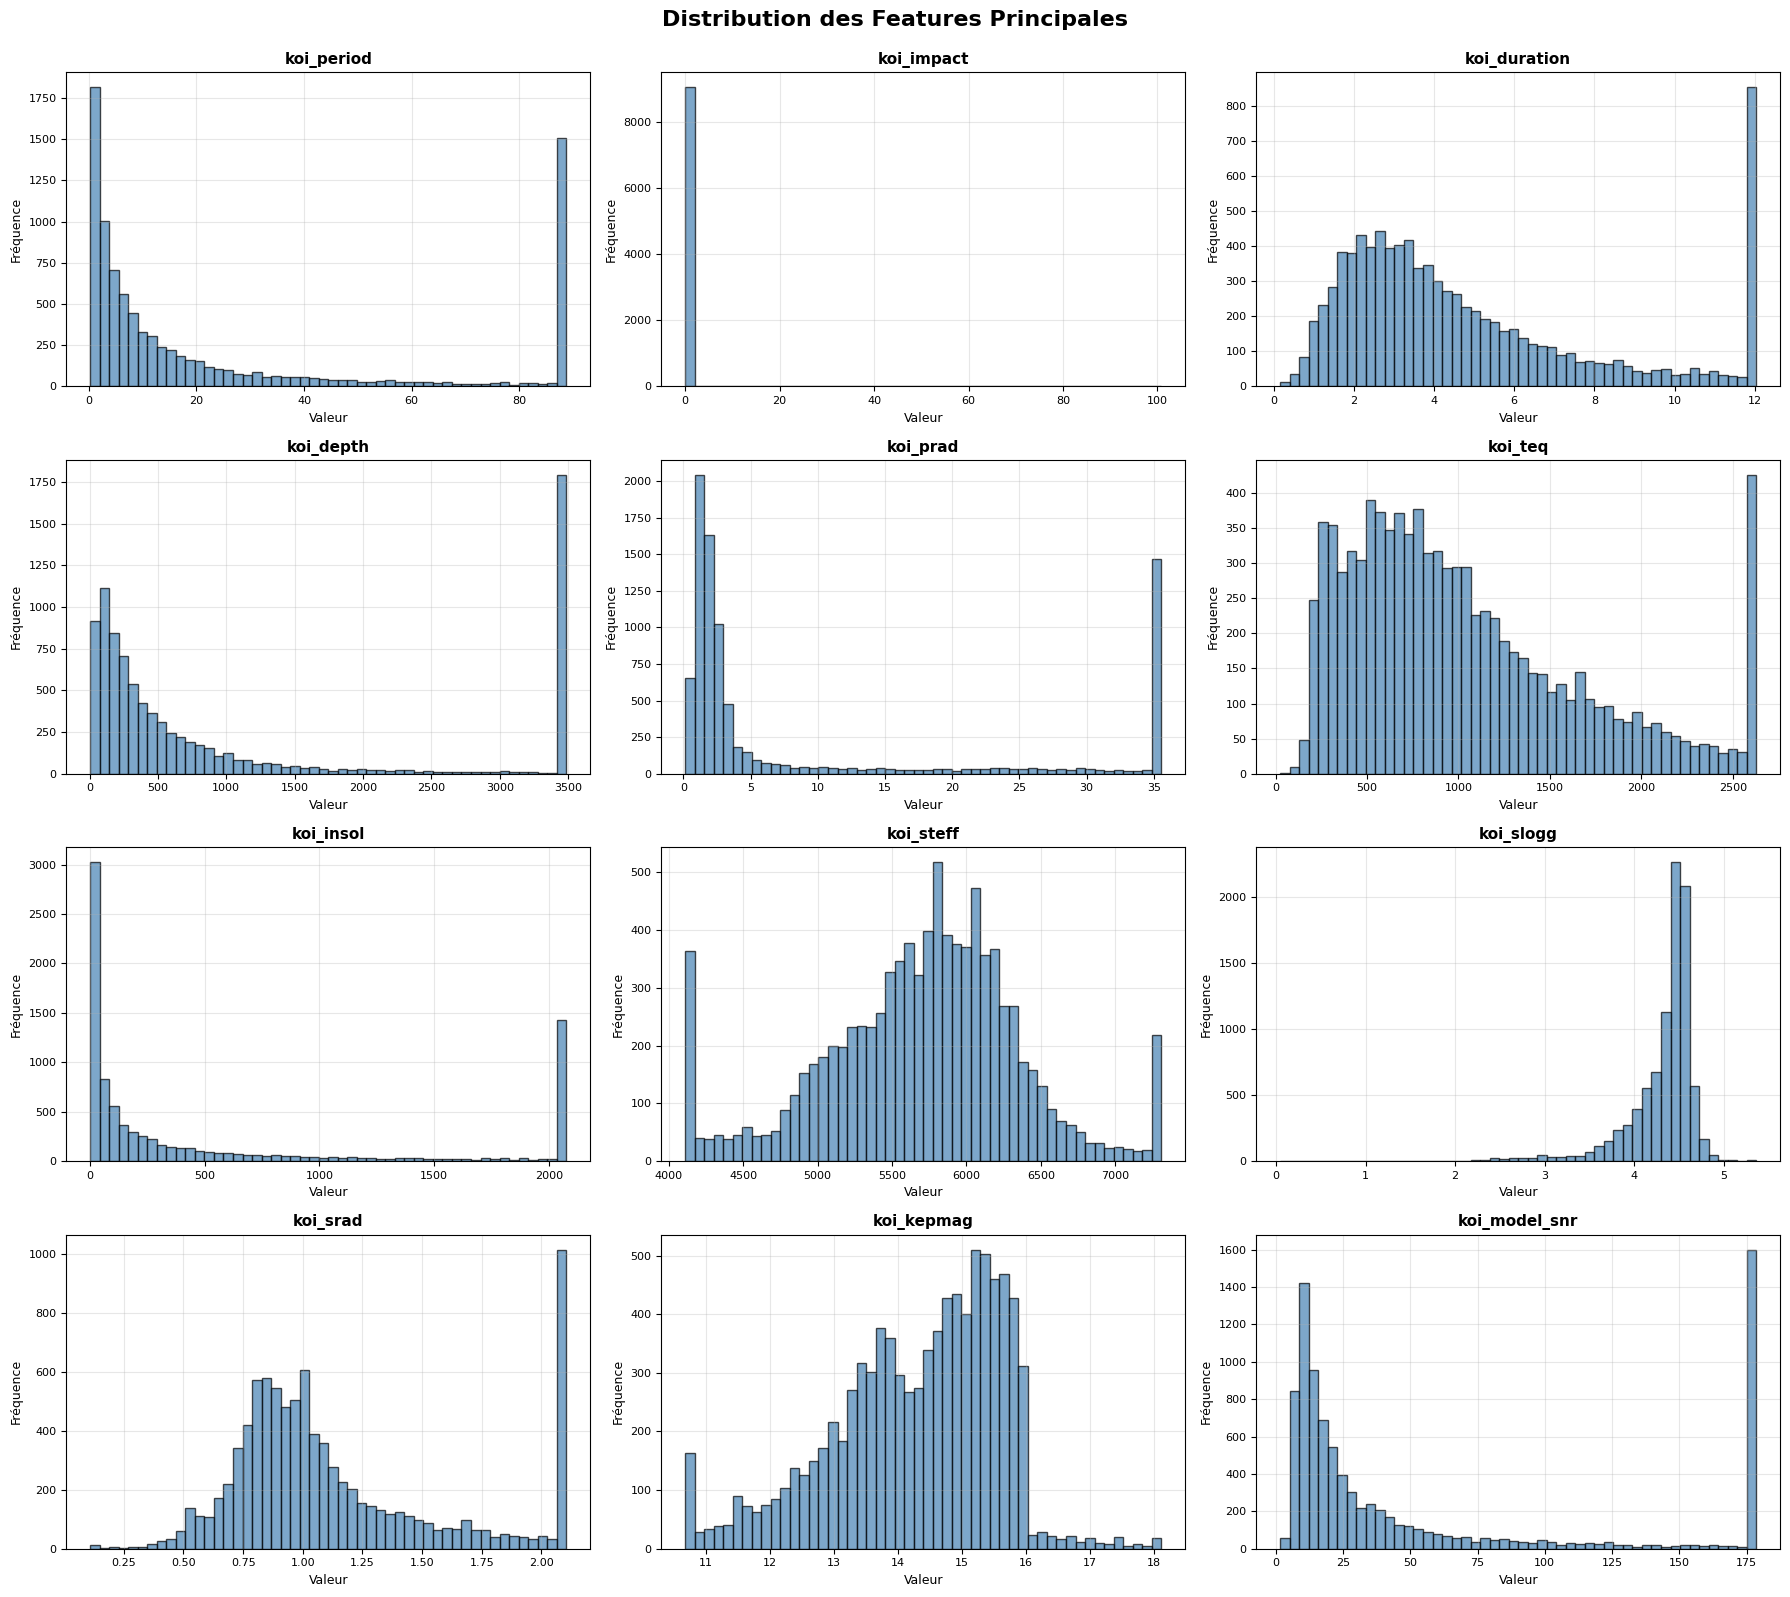

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Charger le dataset
file_path = "C:/Users/chaym/Desktop/NasaProject/data/processed/Kepler_winsorized.csv"
df = pd.read_csv(file_path)

print(f"{'='*80}")
print(f"ÉTAPE 2 - SÉLECTION DES FEATURES")
print(f"{'='*80}\n")

print(f"Dimensions du dataset: {df.shape}\n")

# ================================================================================
# 1. IDENTIFICATION DES COLONNES
# ================================================================================

print(f"{'='*80}")
print(f"1. IDENTIFICATION DES COLONNES")
print(f"{'='*80}\n")

print("Toutes les colonnes du dataset:")
for i, col in enumerate(df.columns, 1):
    print(f"  {i:2d}. {col}")

# ================================================================================
# 2. COLONNES À EXCLURE
# ================================================================================

print(f"\n{'='*80}")
print(f"2. COLONNES À EXCLURE")
print(f"{'='*80}\n")

# Colonnes d'identification (non pertinentes pour la prédiction)
id_columns = ['kepid', 'kepoi_name']

# Variable cible
target_column = 'koi_disposition'

# Colonnes supprimées précédemment ou non pertinentes
removed_columns = []  # Si vous en avez supprimé d'autres

# Liste complète des colonnes à exclure
exclude_columns = id_columns + [target_column] + removed_columns

print("Colonnes à exclure:")
for col in exclude_columns:
    if col in df.columns:
        print(f"  ✗ {col}")
        reason = ""
        if col in id_columns:
            reason = "(Identifiant)"
        elif col == target_column:
            reason = "(Variable cible)"
        else:
            reason = "(Supprimée)"
        print(f"     → Raison: {reason}")

# ================================================================================
# 3. SÉPARATION X (FEATURES) ET y (TARGET)
# ================================================================================

print(f"\n{'='*80}")
print(f"3. SÉPARATION X (FEATURES) ET y (TARGET)")
print(f"{'='*80}\n")

# Vérifier que la variable cible existe
if target_column not in df.columns:
    print(f"❌ Erreur: La colonne '{target_column}' n'existe pas!")
else:
    # Séparer X et y
    y = df[target_column].copy()
    X = df.drop(columns=exclude_columns, errors='ignore')
    
    print(f"✓ Séparation effectuée:")
    print(f"  • X (Features): {X.shape}")
    print(f"  • y (Target): {y.shape}")
    
    print(f"\n✓ Nombre de features sélectionnées: {X.shape[1]}")
    print(f"✓ Nombre d'observations: {X.shape[0]}")

# ================================================================================
# 4. LISTE DES FEATURES SÉLECTIONNÉES
# ================================================================================

print(f"\n{'='*80}")
print(f"4. FEATURES SÉLECTIONNÉES")
print(f"{'='*80}\n")

print(f"Liste des {X.shape[1]} features:")
for i, col in enumerate(X.columns, 1):
    print(f"  {i:2d}. {col}")

# ================================================================================
# 5. CATÉGORISATION DES FEATURES
# ================================================================================

print(f"\n{'='*80}")
print(f"5. CATÉGORISATION DES FEATURES")
print(f"{'='*80}\n")

# Catégoriser les features par type
feature_categories = {
    'Période': [],
    'Impact': [],
    'Durée': [],
    'Profondeur': [],
    'Rayon planétaire': [],
    'Température': [],
    'Insolation': [],
    'Étoile (Température)': [],
    'Étoile (Gravité)': [],
    'Étoile (Rayon)': [],
    'Magnitude': [],
    'SNR': [],
    'Autres': []
}

for col in X.columns:
    if 'period' in col.lower():
        feature_categories['Période'].append(col)
    elif 'impact' in col.lower():
        feature_categories['Impact'].append(col)
    elif 'duration' in col.lower():
        feature_categories['Durée'].append(col)
    elif 'depth' in col.lower():
        feature_categories['Profondeur'].append(col)
    elif 'prad' in col.lower():
        feature_categories['Rayon planétaire'].append(col)
    elif 'teq' in col.lower():
        feature_categories['Température'].append(col)
    elif 'insol' in col.lower():
        feature_categories['Insolation'].append(col)
    elif 'steff' in col.lower():
        feature_categories['Étoile (Température)'].append(col)
    elif 'slogg' in col.lower():
        feature_categories['Étoile (Gravité)'].append(col)
    elif 'srad' in col.lower():
        feature_categories['Étoile (Rayon)'].append(col)
    elif 'kepmag' in col.lower():
        feature_categories['Magnitude'].append(col)
    elif 'snr' in col.lower():
        feature_categories['SNR'].append(col)
    else:
        feature_categories['Autres'].append(col)

# Afficher les catégories
for category, features in feature_categories.items():
    if features:
        print(f"\n{category} ({len(features)} features):")
        for feat in features:
            print(f"  • {feat}")

# ================================================================================
# 6. TYPES DE DONNÉES
# ================================================================================

print(f"\n{'='*80}")
print(f"6. TYPES DE DONNÉES")
print(f"{'='*80}\n")

print("Distribution des types de données:")
print(X.dtypes.value_counts())

print("\nDétail par colonne:")
for dtype in X.dtypes.unique():
    cols_of_type = X.select_dtypes(include=[dtype]).columns.tolist()
    print(f"\n{dtype} ({len(cols_of_type)} colonnes):")
    for col in cols_of_type[:5]:  # Afficher les 5 premières
        print(f"  • {col}")
    if len(cols_of_type) > 5:
        print(f"  ... et {len(cols_of_type) - 5} autres")

# ================================================================================
# 7. STATISTIQUES DESCRIPTIVES
# ================================================================================

print(f"\n{'='*80}")
print(f"7. APERÇU DES DONNÉES (5 premières lignes)")
print(f"{'='*80}\n")

print(X.head())

print(f"\n{'='*80}")
print(f"8. STATISTIQUES DESCRIPTIVES")
print(f"{'='*80}\n")

stats = X.describe()
print(stats)

# ================================================================================
# 9. VISUALISATION DE LA DISTRIBUTION DES FEATURES
# ================================================================================

print(f"\n{'='*80}")
print(f"9. VISUALISATION")
print(f"{'='*80}\n")

# Sélectionner quelques features importantes pour visualisation
key_features = ['koi_period', 'koi_impact', 'koi_duration', 'koi_depth', 
                'koi_prad', 'koi_teq', 'koi_insol', 'koi_steff', 
                'koi_slogg', 'koi_srad', 'koi_kepmag', 'koi_model_snr']

key_features = [f for f in key_features if f in X.columns]

# Créer des histogrammes
fig, axes = plt.subplots(4, 3, figsize=(18, 16))
axes = axes.flatten()

for idx, col in enumerate(key_features):
    axes[idx].hist(X[col].dropna(), bins=50, color='steelblue', 
                   edgecolor='black', alpha=0.7)
    axes[idx].set_title(f'{col}', fontweight='bold', fontsize=11)
    axes[idx].set_xlabel('Valeur', fontsize=9)
    axes[idx].set_ylabel('Fréquence', fontsize=9)
    axes[idx].grid(True, alpha=0.3)
    axes[idx].tick_params(labelsize=8)

# Masquer les axes vides
for idx in range(len(key_features), len(axes)):
    axes[idx].axis('off')

plt.suptitle('Distribution des Features Principales', 
             fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()
plt.savefig('C:/Users/chaym/Desktop/NasaProject/data/processed/step2_features_distribution.png', 
            dpi=300, bbox_inches='tight')

print("✓ Graphiques sauvegardés: step2_features_distribution.png")

# ================================================================================
# 10. SAUVEGARDE DES DONNÉES
# ================================================================================

print(f"\n{'='*80}")
print(f"10. SAUVEGARDE")
print(f"{'='*80}\n")

# Sauvegarder X et y séparément
X.to_csv('C:/Users/chaym/Desktop/NasaProject/data/processed/step2_X_features.csv', index=False)
y.to_csv('C:/Users/chaym/Desktop/NasaProject/data/processed/step2_y_target.csv', index=False)

print("✓ Fichiers sauvegardés:")
print("  1. step2_X_features.csv - Features (X)")
print("  2. step2_y_target.csv - Target (y)")

# Sauvegarder la liste des features avec leur catégorie
feature_info = []
for category, features in feature_categories.items():
    for feat in features:
        feature_info.append({
            'Feature': feat,
            'Catégorie': category,
            'Type': str(X[feat].dtype),
            'Non-Null': X[feat].notna().sum(),
            'Null': X[feat].isna().sum()
        })

feature_info_df = pd.DataFrame(feature_info)
feature_info_df.to_csv('C:/Users/chaym/Desktop/NasaProject/data/processed/step2_features_info.csv', 
                       index=False)

print("  3. step2_features_info.csv - Informations détaillées sur les features")

# ================================================================================
# 11. RÉSUMÉ
# ================================================================================

print(f"\n{'='*80}")
print(f"RÉSUMÉ DE L'ÉTAPE 2")
print(f"{'='*80}\n")

summary = {
    'Dataset original': df.shape,
    'Features (X)': X.shape,
    'Target (y)': y.shape,
    'Colonnes exclues': len(exclude_columns),
    'Features numériques': len(X.select_dtypes(include=[np.number]).columns),
    'Features catégorielles': len(X.select_dtypes(exclude=[np.number]).columns),
}

for key, value in summary.items():
    print(f"  {key}: {value}")

print(f"\n{'='*80}")
print(f"ÉTAPE 2 TERMINÉE ✓")
print(f"{'='*80}")
print("\nFichiers générés:")
print("  1. step2_X_features.csv - Matrix des features")
print("  2. step2_y_target.csv - Vecteur cible")
print("  3. step2_features_distribution.png - Visualisations")
print("  4. step2_features_info.csv - Documentation des features")
print("\n➡️  Passer à l'Étape 3: Vérification finale des données")

ÉTAPE 3 - VÉRIFICATION FINALE DES DONNÉES

Dimensions X: (9110, 33)
Dimensions y: (9110, 1)

1. VÉRIFICATION DES VALEURS MANQUANTES

✓ Aucune valeur manquante détectée dans X
✓ Aucune valeur manquante dans y

2. VÉRIFICATION DES VALEURS INFINIES

✓ Aucune valeur infinie détectée

3. VÉRIFICATION DES TYPES DE DONNÉES

Distribution des types de données:
float64    33
Name: count, dtype: int64

✓ Toutes les colonnes sont numériques

4. VÉRIFICATION DES RANGES DE VALEURS

Range des valeurs pour features principales:

      Feature       Min       Max      Mean       Std
   koi_period    0.2418   88.7212   25.8522   32.1211
     koi_prad    0.1400   35.5537    9.8915   13.1548
    koi_depth    4.5000 3485.8875 1085.7320 1292.8424
      koi_teq   25.0000 2628.0000 1032.5424  644.3503
    koi_steff 4111.5000 7307.5000 5695.4442  668.0875
     koi_srad    0.1090    2.1040    1.1417    0.4582
koi_model_snr    1.6000  178.6000   56.7057   63.3019

5. VÉRIFICATION DE LA COHÉRENCE DES DIMENSIONS



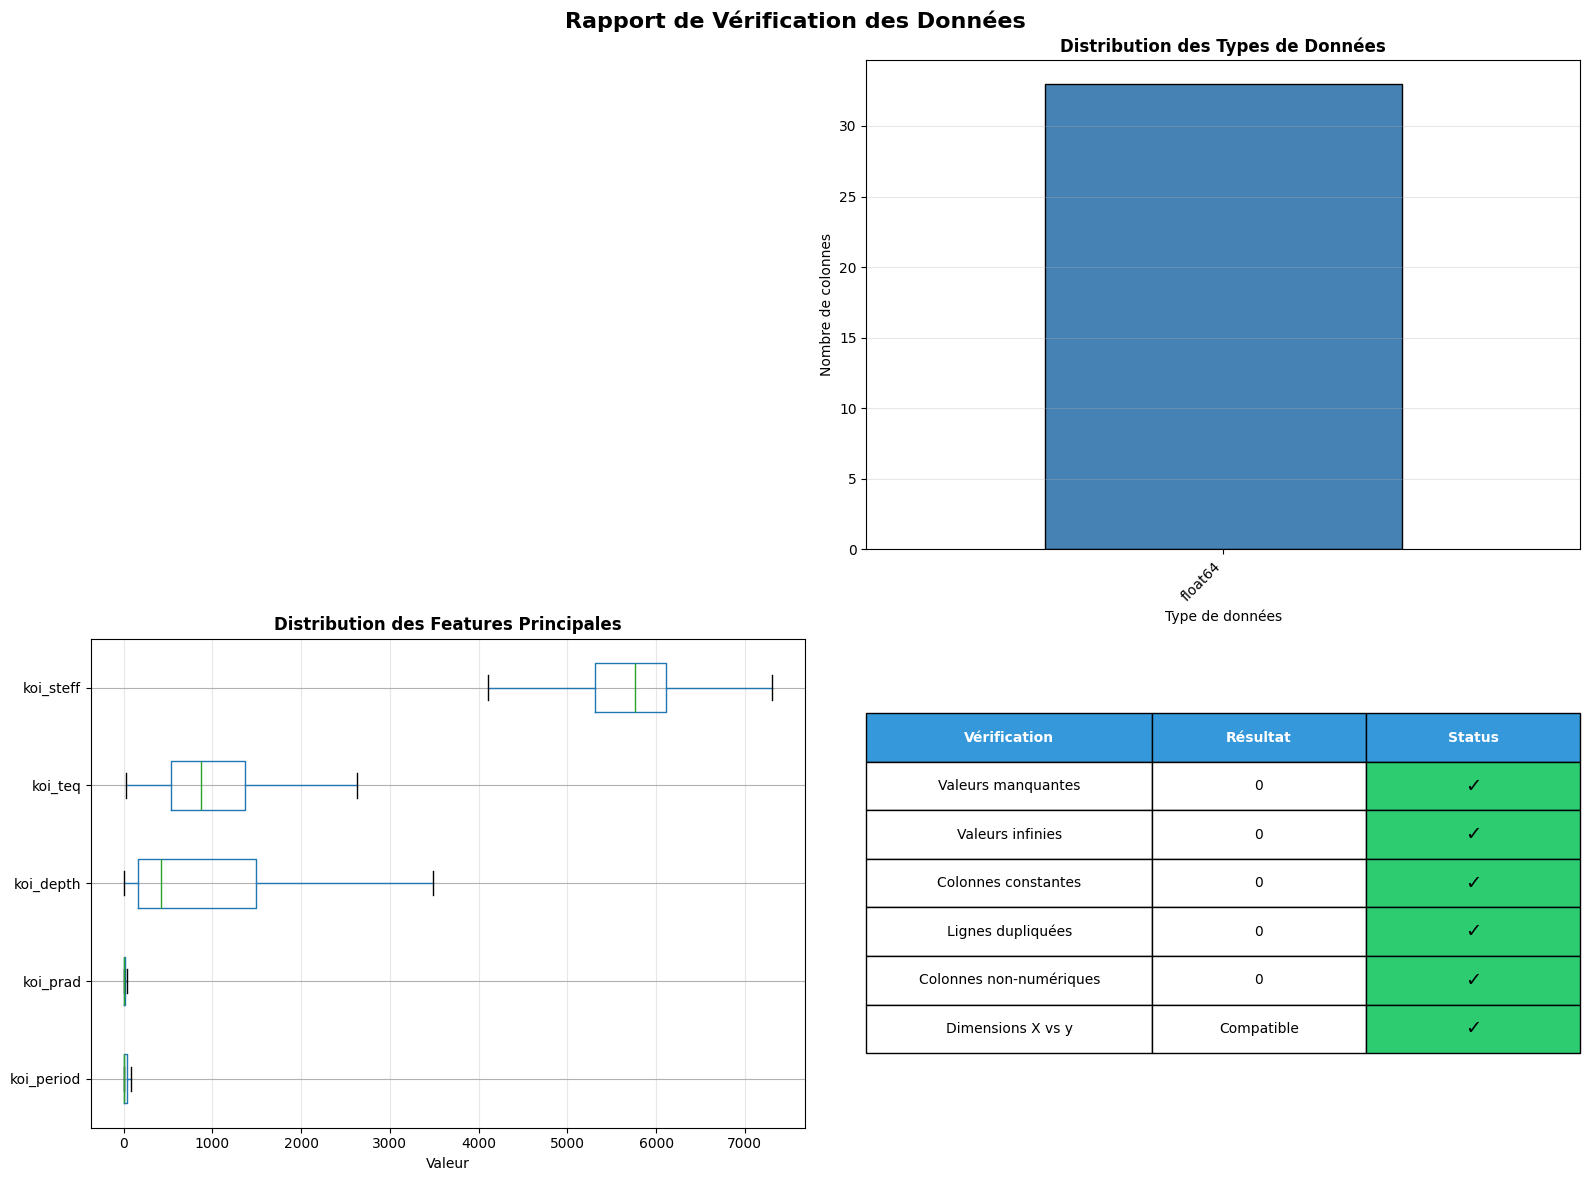

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Charger les données préparées
X = pd.read_csv('C:/Users/chaym/Desktop/NasaProject/data/processed/step2_X_features.csv')
y = pd.read_csv('C:/Users/chaym/Desktop/NasaProject/data/processed/step2_y_target.csv')

print(f"{'='*80}")
print(f"ÉTAPE 3 - VÉRIFICATION FINALE DES DONNÉES")
print(f"{'='*80}\n")

print(f"Dimensions X: {X.shape}")
print(f"Dimensions y: {y.shape}\n")

# ================================================================================
# 1. VÉRIFICATION DES VALEURS MANQUANTES
# ================================================================================

print(f"{'='*80}")
print(f"1. VÉRIFICATION DES VALEURS MANQUANTES")
print(f"{'='*80}\n")

# Comptage des valeurs manquantes
missing_counts = X.isnull().sum()
missing_percentages = (X.isnull().sum() / len(X)) * 100

# Créer un DataFrame pour l'affichage
missing_df = pd.DataFrame({
    'Feature': missing_counts.index,
    'Missing_Count': missing_counts.values,
    'Missing_Percentage': missing_percentages.values
})

# Trier par nombre de valeurs manquantes
missing_df = missing_df.sort_values('Missing_Count', ascending=False)

# Afficher seulement les colonnes avec des valeurs manquantes
missing_df_filtered = missing_df[missing_df['Missing_Count'] > 0]

if len(missing_df_filtered) > 0:
    print(f"⚠️  {len(missing_df_filtered)} colonnes avec valeurs manquantes:\n")
    print(missing_df_filtered.to_string(index=False))
    print(f"\n❌ ATTENTION: Des valeurs manquantes ont été détectées!")
    print("   → Il faut les traiter avant de continuer")
else:
    print("✓ Aucune valeur manquante détectée dans X")

# Vérifier y
missing_y = y.isnull().sum().sum()
if missing_y > 0:
    print(f"\n⚠️  {missing_y} valeurs manquantes dans y")
else:
    print("✓ Aucune valeur manquante dans y")

# Visualisation des valeurs manquantes
if len(missing_df_filtered) > 0:
    plt.figure(figsize=(12, 6))
    plt.barh(missing_df_filtered['Feature'][:20], missing_df_filtered['Missing_Percentage'][:20], 
             color='#e74c3c', edgecolor='black')
    plt.xlabel('Pourcentage de valeurs manquantes (%)', fontsize=12)
    plt.ylabel('Features', fontsize=12)
    plt.title('Top 20 Features avec Valeurs Manquantes', fontsize=14, fontweight='bold', pad=15)
    plt.grid(True, alpha=0.3, axis='x')
    plt.tight_layout()
    plt.savefig('C:/Users/chaym/Desktop/NasaProject/data/processed/step3_missing_values.png', 
                dpi=300, bbox_inches='tight')
    print("\n✓ Graphique sauvegardé: step3_missing_values.png")

# ================================================================================
# 2. VÉRIFICATION DES VALEURS INFINIES
# ================================================================================

print(f"\n{'='*80}")
print(f"2. VÉRIFICATION DES VALEURS INFINIES")
print(f"{'='*80}\n")

# Vérifier les valeurs infinies
inf_counts = np.isinf(X.select_dtypes(include=[np.number])).sum()
inf_counts_filtered = inf_counts[inf_counts > 0]

if len(inf_counts_filtered) > 0:
    print(f"⚠️  {len(inf_counts_filtered)} colonnes avec valeurs infinies:\n")
    for col, count in inf_counts_filtered.items():
        print(f"  • {col}: {count} valeurs infinies")
    print(f"\n❌ ATTENTION: Des valeurs infinies ont été détectées!")
    print("   → Il faut les traiter avant de continuer")
else:
    print("✓ Aucune valeur infinie détectée")

# ================================================================================
# 3. VÉRIFICATION DES TYPES DE DONNÉES
# ================================================================================

print(f"\n{'='*80}")
print(f"3. VÉRIFICATION DES TYPES DE DONNÉES")
print(f"{'='*80}\n")

print("Distribution des types de données:")
type_counts = X.dtypes.value_counts()
print(type_counts)

# Vérifier s'il y a des colonnes non numériques
non_numeric = X.select_dtypes(exclude=[np.number]).columns.tolist()

if len(non_numeric) > 0:
    print(f"\n⚠️  {len(non_numeric)} colonnes non-numériques détectées:")
    for col in non_numeric:
        print(f"  • {col} ({X[col].dtype})")
        print(f"    Valeurs uniques: {X[col].nunique()}")
        print(f"    Exemples: {X[col].unique()[:5].tolist()}")
    print("\n💡 Ces colonnes nécessitent un encodage avant la modélisation")
else:
    print("\n✓ Toutes les colonnes sont numériques")

# ================================================================================
# 4. VÉRIFICATION DES VALEURS ABERRANTES (RANGE)
# ================================================================================

print(f"\n{'='*80}")
print(f"4. VÉRIFICATION DES RANGES DE VALEURS")
print(f"{'='*80}\n")

# Statistiques min/max pour quelques colonnes clés
key_features = ['koi_period', 'koi_prad', 'koi_depth', 'koi_teq', 
                'koi_steff', 'koi_srad', 'koi_model_snr']
key_features = [f for f in key_features if f in X.columns]

print("Range des valeurs pour features principales:\n")
range_data = []
for col in key_features:
    range_data.append({
        'Feature': col,
        'Min': f"{X[col].min():.4f}",
        'Max': f"{X[col].max():.4f}",
        'Mean': f"{X[col].mean():.4f}",
        'Std': f"{X[col].std():.4f}"
    })

range_df = pd.DataFrame(range_data)
print(range_df.to_string(index=False))

# ================================================================================
# 5. VÉRIFICATION DE LA COHÉRENCE DES DIMENSIONS
# ================================================================================

print(f"\n{'='*80}")
print(f"5. VÉRIFICATION DE LA COHÉRENCE DES DIMENSIONS")
print(f"{'='*80}\n")

# Vérifier que X et y ont le même nombre de lignes
if X.shape[0] == y.shape[0]:
    print(f"✓ X et y ont le même nombre d'observations: {X.shape[0]}")
else:
    print(f"❌ ERREUR: Dimensions incompatibles!")
    print(f"   X: {X.shape[0]} lignes")
    print(f"   y: {y.shape[0]} lignes")

# Vérifier qu'il n'y a pas de doublons d'index
if X.index.duplicated().any():
    print(f"\n⚠️  {X.index.duplicated().sum()} index dupliqués dans X")
else:
    print("✓ Pas d'index dupliqué dans X")

# ================================================================================
# 6. VÉRIFICATION DES VALEURS CONSTANTES
# ================================================================================

print(f"\n{'='*80}")
print(f"6. VÉRIFICATION DES COLONNES CONSTANTES")
print(f"{'='*80}\n")

# Identifier les colonnes avec une seule valeur unique
constant_cols = []
for col in X.columns:
    if X[col].nunique() == 1:
        constant_cols.append(col)

if len(constant_cols) > 0:
    print(f"⚠️  {len(constant_cols)} colonnes constantes détectées:")
    for col in constant_cols:
        print(f"  • {col} (valeur: {X[col].unique()[0]})")
    print("\n💡 Ces colonnes n'apportent aucune information et devraient être supprimées")
else:
    print("✓ Aucune colonne constante détectée")

# ================================================================================
# 7. VÉRIFICATION DES DUPLICATIONS DE LIGNES
# ================================================================================

print(f"\n{'='*80}")
print(f"7. VÉRIFICATION DES LIGNES DUPLIQUÉES")
print(f"{'='*80}\n")

# Compter les lignes dupliquées
duplicated_rows = X.duplicated().sum()

if duplicated_rows > 0:
    print(f"⚠️  {duplicated_rows} lignes dupliquées détectées")
    print(f"   Pourcentage: {(duplicated_rows/len(X)*100):.2f}%")
    print("\n💡 Considérer la suppression des doublons")
else:
    print("✓ Aucune ligne dupliquée")

# ================================================================================
# 8. DISTRIBUTION DES VALEURS (SKEWNESS & KURTOSIS)
# ================================================================================

print(f"\n{'='*80}")
print(f"8. ANALYSE DE LA DISTRIBUTION (SKEWNESS & KURTOSIS)")
print(f"{'='*80}\n")

# Calculer skewness et kurtosis
numeric_cols = X.select_dtypes(include=[np.number]).columns
skew_data = []

for col in numeric_cols[:10]:  # Afficher les 10 premières
    skewness = X[col].skew()
    kurtosis = X[col].kurtosis()
    skew_data.append({
        'Feature': col,
        'Skewness': f"{skewness:.2f}",
        'Kurtosis': f"{kurtosis:.2f}"
    })

skew_df = pd.DataFrame(skew_data)
print("Distribution des 10 premières features:\n")
print(skew_df.to_string(index=False))

print("\n💡 Interprétation:")
print("  • Skewness proche de 0: Distribution symétrique")
print("  • |Skewness| > 1: Distribution très asymétrique → Transformation nécessaire")
print("  • Kurtosis > 3: Distribution avec queues lourdes (outliers)")

# ================================================================================
# 9. VISUALISATION GLOBALE
# ================================================================================

print(f"\n{'='*80}")
print(f"9. GÉNÉRATION DES VISUALISATIONS")
print(f"{'='*80}\n")

# Créer une figure avec plusieurs graphiques de vérification
fig = plt.figure(figsize=(16, 12))

# 9.1 Heatmap des valeurs manquantes (si présentes)
if len(missing_df_filtered) > 0:
    ax1 = plt.subplot(2, 2, 1)
    missing_matrix = X[missing_df_filtered['Feature'][:20]].isnull()
    sns.heatmap(missing_matrix, cbar=True, cmap='RdYlGn_r', ax=ax1)
    plt.title('Carte des Valeurs Manquantes', fontweight='bold', fontsize=12)
    plt.xlabel('Features')
    plt.ylabel('Observations')

# 9.2 Distribution des types de données
ax2 = plt.subplot(2, 2, 2)
type_counts.plot(kind='bar', color='steelblue', edgecolor='black', ax=ax2)
plt.title('Distribution des Types de Données', fontweight='bold', fontsize=12)
plt.xlabel('Type de données')
plt.ylabel('Nombre de colonnes')
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3, axis='y')

# 9.3 Boxplot pour détecter les outliers sur quelques features
ax3 = plt.subplot(2, 2, 3)
key_features_plot = [f for f in key_features if f in X.columns][:5]
X[key_features_plot].boxplot(ax=ax3, vert=False)
plt.title('Distribution des Features Principales', fontweight='bold', fontsize=12)
plt.xlabel('Valeur')
plt.grid(True, alpha=0.3, axis='x')

# 9.4 Résumé des vérifications
ax4 = plt.subplot(2, 2, 4)
ax4.axis('tight')
ax4.axis('off')

# Créer un tableau récapitulatif
verification_summary = [
    ['Vérification', 'Résultat', 'Status'],
    ['Valeurs manquantes', f"{missing_counts.sum()}", '✓' if missing_counts.sum() == 0 else '⚠️'],
    ['Valeurs infinies', f"{inf_counts.sum()}", '✓' if inf_counts.sum() == 0 else '⚠️'],
    ['Colonnes constantes', f"{len(constant_cols)}", '✓' if len(constant_cols) == 0 else '⚠️'],
    ['Lignes dupliquées', f"{duplicated_rows}", '✓' if duplicated_rows == 0 else '⚠️'],
    ['Colonnes non-numériques', f"{len(non_numeric)}", '✓' if len(non_numeric) == 0 else '⚠️'],
    ['Dimensions X vs y', 'Compatible', '✓' if X.shape[0] == y.shape[0] else '❌']
]

table = ax4.table(cellText=verification_summary,
                  cellLoc='center',
                  loc='center',
                  colWidths=[0.4, 0.3, 0.3])

table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 2.5)

# Style du tableau
for i in range(len(verification_summary)):
    for j in range(3):
        cell = table[(i, j)]
        if i == 0:  # Header
            cell.set_facecolor('#3498db')
            cell.set_text_props(weight='bold', color='white')
        else:
            if j == 2:  # Colonne Status
                if verification_summary[i][2] == '✓':
                    cell.set_facecolor('#2ecc71')
                elif verification_summary[i][2] == '⚠️':
                    cell.set_facecolor('#f39c12')
                else:
                    cell.set_facecolor('#e74c3c')
                cell.set_text_props(weight='bold', fontsize=14)

plt.suptitle('Rapport de Vérification des Données', 
             fontsize=16, fontweight='bold', y=0.98)
plt.tight_layout()
plt.savefig('C:/Users/chaym/Desktop/NasaProject/data/processed/step3_verification_report.png', 
            dpi=300, bbox_inches='tight')

print("✓ Rapport visuel sauvegardé: step3_verification_report.png")

# ================================================================================
# 10. EXPORT DU RAPPORT DE VÉRIFICATION
# ================================================================================

print(f"\n{'='*80}")
print(f"10. EXPORT DU RAPPORT")
print(f"{'='*80}\n")

# Créer un rapport complet
report = {
    'Total Observations': [X.shape[0]],
    'Total Features': [X.shape[1]],
    'Valeurs Manquantes': [missing_counts.sum()],
    'Valeurs Infinies': [inf_counts.sum()],
    'Colonnes Constantes': [len(constant_cols)],
    'Lignes Dupliquées': [duplicated_rows],
    'Colonnes Non-Numériques': [len(non_numeric)],
    'Dimensions Cohérentes': ['Oui' if X.shape[0] == y.shape[0] else 'Non']
}

report_df = pd.DataFrame(report).T
report_df.columns = ['Valeur']
report_df.to_csv('C:/Users/chaym/Desktop/NasaProject/data/processed/step3_verification_report.csv')

print("✓ Rapport détaillé sauvegardé: step3_verification_report.csv")

# ================================================================================
# 11. DÉCISION FINALE
# ================================================================================

print(f"\n{'='*80}")
print(f"11. DÉCISION FINALE")
print(f"{'='*80}\n")

# Vérifier si les données sont prêtes
issues = []

if missing_counts.sum() > 0:
    issues.append(f"• {missing_counts.sum()} valeurs manquantes")
if inf_counts.sum() > 0:
    issues.append(f"• {inf_counts.sum()} valeurs infinies")
if len(constant_cols) > 0:
    issues.append(f"• {len(constant_cols)} colonnes constantes")
if len(non_numeric) > 0:
    issues.append(f"• {len(non_numeric)} colonnes non-numériques")
if X.shape[0] != y.shape[0]:
    issues.append("• Dimensions X et y incompatibles")

if len(issues) == 0:
    print("✅ DONNÉES PRÊTES POUR L'ANALYSE DE CORRÉLATION!")
    print("\n✓ Toutes les vérifications sont passées avec succès")
    print("✓ Aucun problème détecté")
else:
    print("⚠️  PROBLÈMES DÉTECTÉS:")
    for issue in issues:
        print(f"  {issue}")
    print("\n💡 Actions recommandées:")
    if missing_counts.sum() > 0:
        print("  → Traiter les valeurs manquantes (imputation ou suppression)")
    if inf_counts.sum() > 0:
        print("  → Remplacer les valeurs infinies")
    if len(constant_cols) > 0:
        print("  → Supprimer les colonnes constantes")
    if len(non_numeric) > 0:
        print("  → Encoder les colonnes non-numériques")

print(f"\n{'='*80}")
print(f"ÉTAPE 3 TERMINÉE ✓")
print(f"{'='*80}")
print("\nFichiers générés:")
print("  1. step3_verification_report.png - Rapport visuel")
print("  2. step3_verification_report.csv - Rapport détaillé")
if len(missing_df_filtered) > 0:
    print("  3. step3_missing_values.png - Analyse des valeurs manquantes")

if len(issues) == 0:
    print("\n➡️  Passer à l'Étape 4: Analyse de corrélation")
else:
    print("\n⚠️  Corriger les problèmes avant de continuer")

ÉTAPE 4 - ANALYSE DE CORRÉLATION

Dimensions X: (9110, 33)
Dimensions y: (9110, 1)

1. CALCUL DE LA MATRICE DE CORRÉLATION

Nombre de features numériques: 33
✓ Matrice de corrélation calculée: (33, 33)

2. IDENTIFICATION DES CORRÉLATIONS ÉLEVÉES

Corrélations TRÈS ÉLEVÉES (|r| > 0.9):
Nombre de paires: 7

        Feature_1         Feature_2  Correlation
   koi_depth_err1    koi_depth_err2    -1.000000
koi_duration_err1 koi_duration_err2    -1.000000
  koi_period_err1   koi_period_err2    -1.000000
         koi_prad      koi_prad_log     0.962690
          koi_teq         koi_insol     0.936779
   koi_insol_err1    koi_insol_err2    -0.911774
       koi_period    koi_period_log     0.901604

⚠️  MULTICOLINÉARITÉ DÉTECTÉE!
💡 Recommandation: Supprimer une des deux features dans chaque paire

--------------------------------------------------------------------------------
Corrélations MODÉRÉES À ÉLEVÉES (0.7 < |r| ≤ 0.9):
Nombre de paires: 18

     Feature_1       Feature_2  Correlation
  

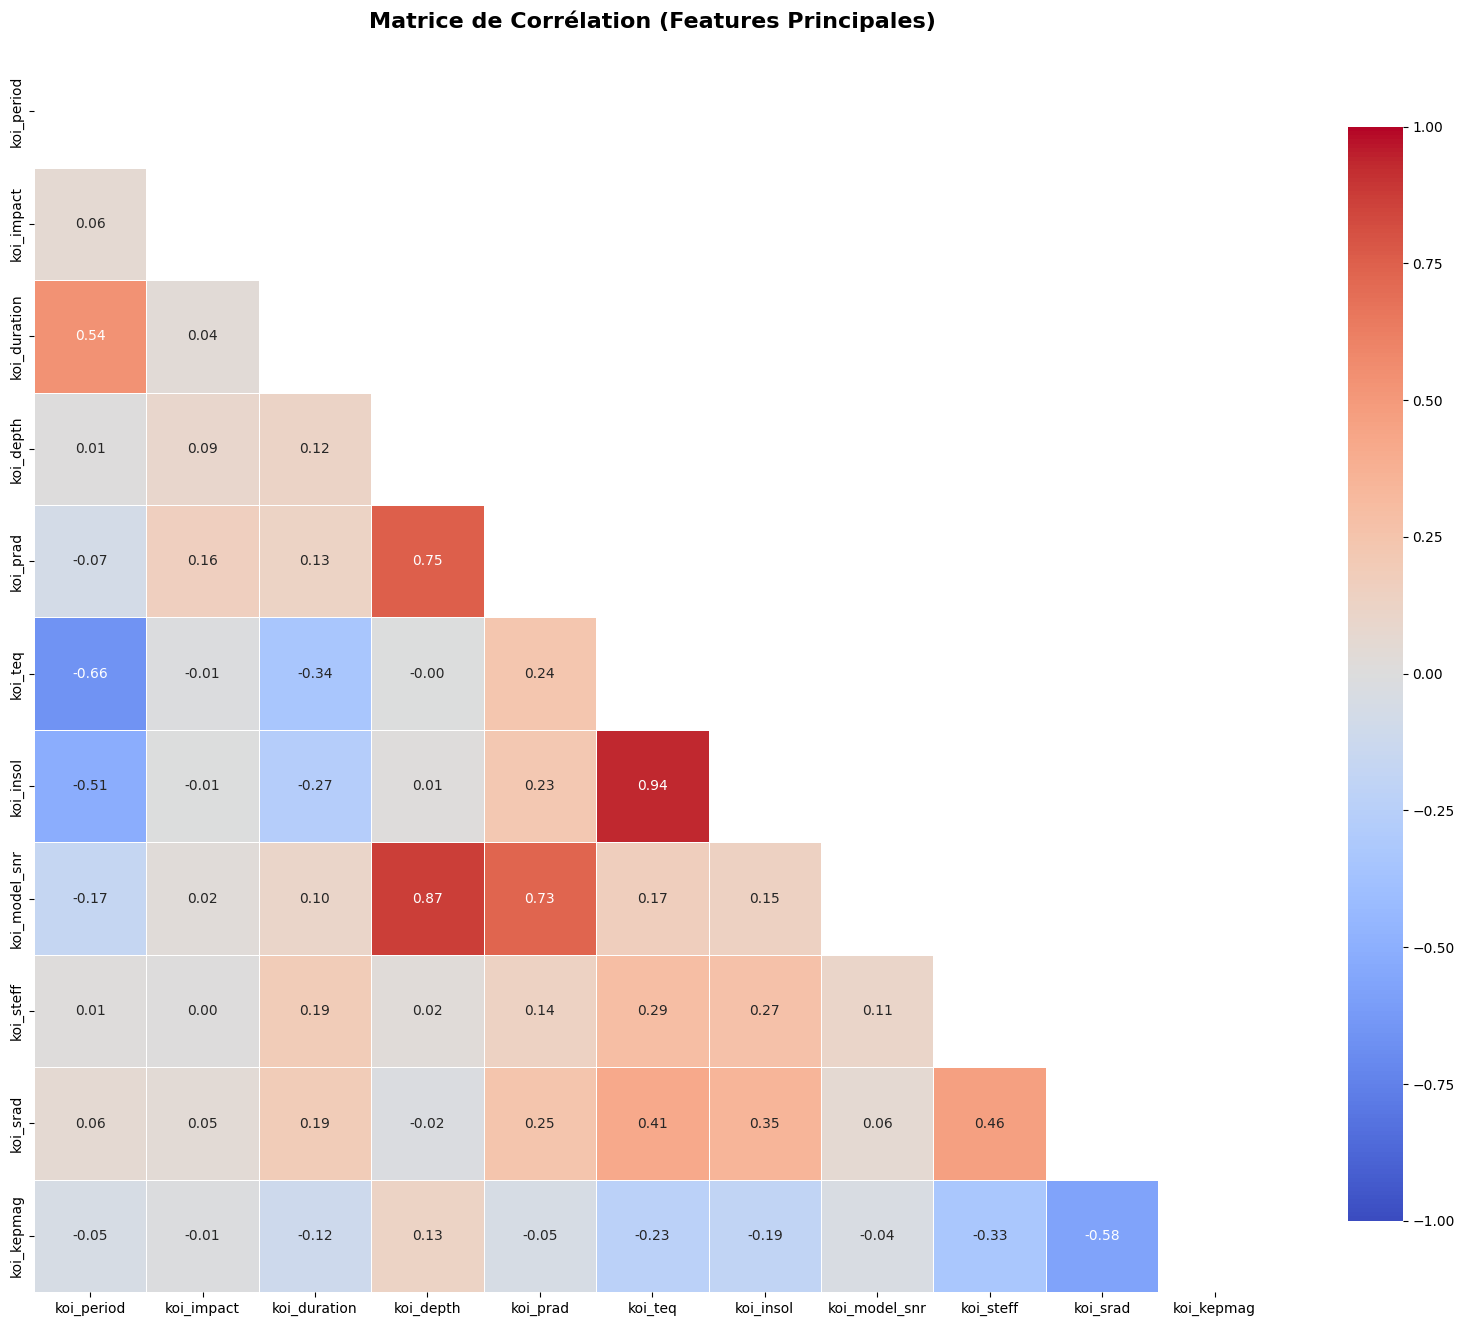

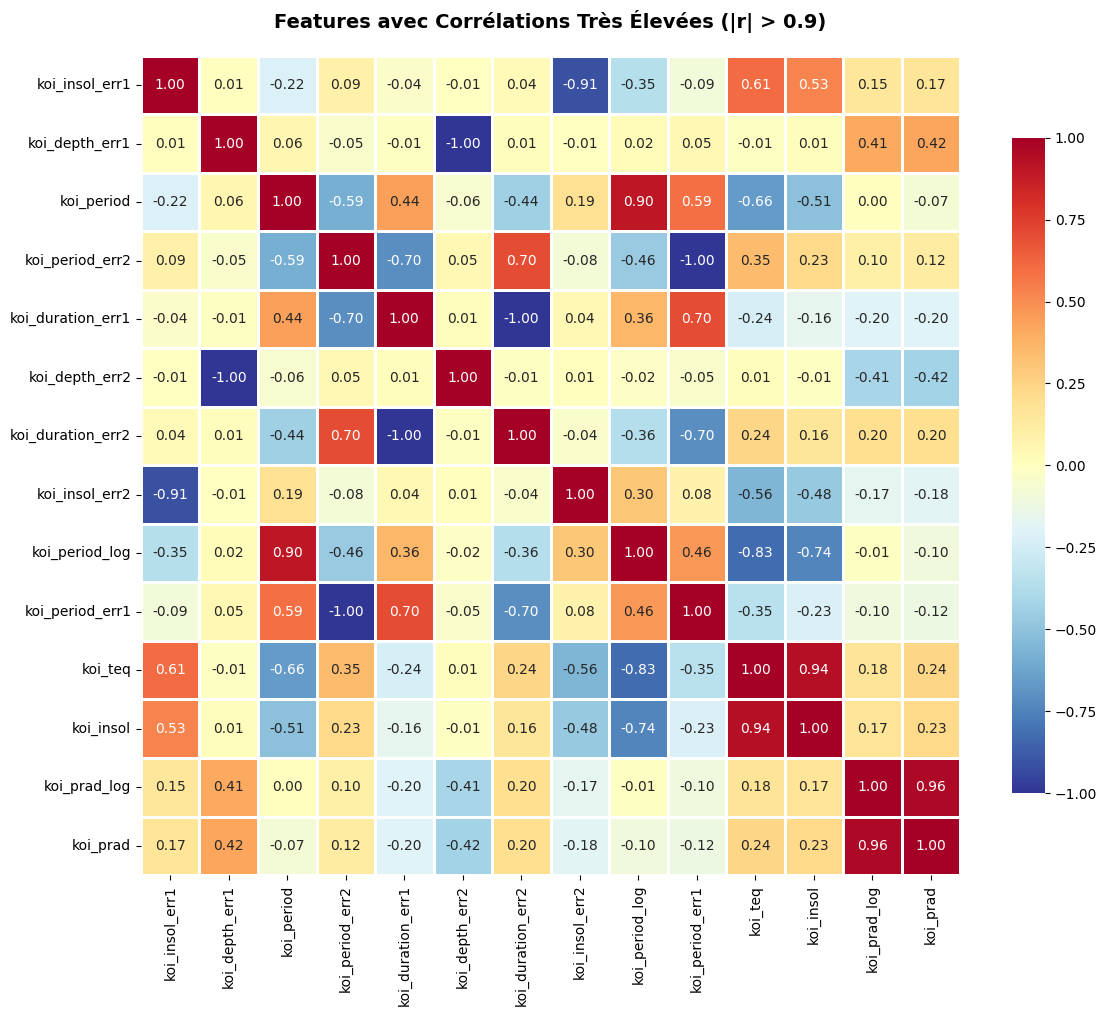

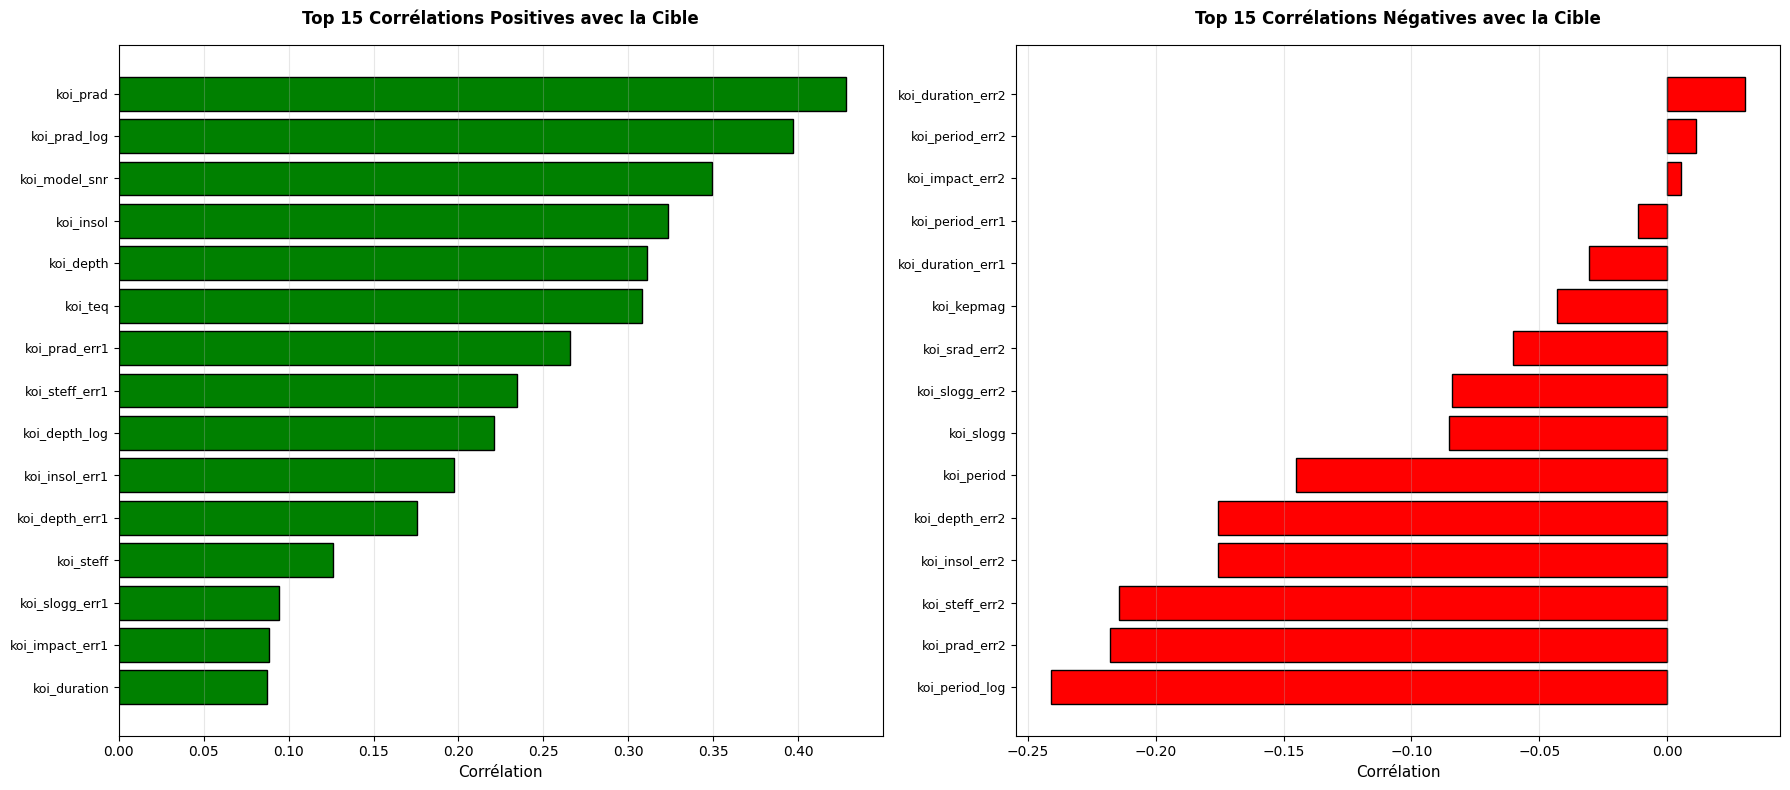

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr

# Charger les données
X = pd.read_csv('C:/Users/chaym/Desktop/NasaProject/data/processed/step2_X_features.csv')
y = pd.read_csv('C:/Users/chaym/Desktop/NasaProject/data/processed/step2_y_target.csv')

print(f"{'='*80}")
print(f"ÉTAPE 4 - ANALYSE DE CORRÉLATION")
print(f"{'='*80}\n")

print(f"Dimensions X: {X.shape}")
print(f"Dimensions y: {y.shape}\n")

# ================================================================================
# 1. MATRICE DE CORRÉLATION COMPLÈTE
# ================================================================================

print(f"{'='*80}")
print(f"1. CALCUL DE LA MATRICE DE CORRÉLATION")
print(f"{'='*80}\n")

# Sélectionner uniquement les colonnes numériques
numeric_cols = X.select_dtypes(include=[np.number]).columns.tolist()
print(f"Nombre de features numériques: {len(numeric_cols)}")

# Calculer la matrice de corrélation (Pearson)
correlation_matrix = X[numeric_cols].corr()
print(f"✓ Matrice de corrélation calculée: {correlation_matrix.shape}")

# ================================================================================
# 2. IDENTIFICATION DES CORRÉLATIONS ÉLEVÉES
# ================================================================================

print(f"\n{'='*80}")
print(f"2. IDENTIFICATION DES CORRÉLATIONS ÉLEVÉES")
print(f"{'='*80}\n")

# Extraire les paires de features avec corrélation élevée
high_corr_pairs = []
threshold_high = 0.9  # Corrélation très élevée
threshold_moderate = 0.7  # Corrélation modérée à élevée

for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_value = correlation_matrix.iloc[i, j]
        if abs(corr_value) > threshold_moderate:
            high_corr_pairs.append({
                'Feature_1': correlation_matrix.columns[i],
                'Feature_2': correlation_matrix.columns[j],
                'Correlation': corr_value,
                'Abs_Correlation': abs(corr_value)
            })

# Trier par corrélation absolue décroissante
high_corr_df = pd.DataFrame(high_corr_pairs)
high_corr_df = high_corr_df.sort_values('Abs_Correlation', ascending=False)

# Séparer par niveau de corrélation
very_high = high_corr_df[high_corr_df['Abs_Correlation'] > threshold_high]
moderate_high = high_corr_df[(high_corr_df['Abs_Correlation'] > threshold_moderate) & 
                             (high_corr_df['Abs_Correlation'] <= threshold_high)]

print(f"Corrélations TRÈS ÉLEVÉES (|r| > {threshold_high}):")
print(f"Nombre de paires: {len(very_high)}\n")

if len(very_high) > 0:
    print(very_high[['Feature_1', 'Feature_2', 'Correlation']].to_string(index=False))
    print("\n⚠️  MULTICOLINÉARITÉ DÉTECTÉE!")
    print("💡 Recommandation: Supprimer une des deux features dans chaque paire")
else:
    print("✓ Aucune corrélation très élevée détectée")

print(f"\n{'-'*80}")
print(f"Corrélations MODÉRÉES À ÉLEVÉES ({threshold_moderate} < |r| ≤ {threshold_high}):")
print(f"Nombre de paires: {len(moderate_high)}\n")

if len(moderate_high) > 0:
    print(moderate_high[['Feature_1', 'Feature_2', 'Correlation']].head(10).to_string(index=False))
    if len(moderate_high) > 10:
        print(f"\n... et {len(moderate_high) - 10} autres paires")
    print("\n💡 Ces corrélations sont acceptables mais à surveiller")
else:
    print("✓ Aucune corrélation modérée détectée")

# ================================================================================
# 3. VISUALISATION DE LA MATRICE DE CORRÉLATION
# ================================================================================

print(f"\n{'='*80}")
print(f"3. VISUALISATION DE LA MATRICE DE CORRÉLATION")
print(f"{'='*80}\n")

# 3.1 Heatmap complète (features principales seulement)
# Sélectionner les features principales (sans les erreurs)
main_features = [col for col in numeric_cols if not any(x in col for x in ['err1', 'err2', 'log'])]

if len(main_features) > 25:
    main_features = main_features[:25]

print(f"Visualisation des {len(main_features)} features principales...\n")

plt.figure(figsize=(16, 14))
corr_subset = correlation_matrix.loc[main_features, main_features]
mask = np.triu(np.ones_like(corr_subset, dtype=bool))  # Masquer la moitié supérieure

sns.heatmap(corr_subset, 
            mask=mask,
            annot=True, 
            fmt='.2f', 
            cmap='coolwarm',
            center=0, 
            square=True, 
            linewidths=0.5,
            cbar_kws={"shrink": 0.8},
            vmin=-1, 
            vmax=1)

plt.title('Matrice de Corrélation (Features Principales)', 
          fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig('C:/Users/chaym/Desktop/NasaProject/data/processed/step4_correlation_matrix.png', 
            dpi=300, bbox_inches='tight')

print("✓ Heatmap sauvegardée: step4_correlation_matrix.png")

# 3.2 Heatmap des corrélations élevées uniquement
if len(very_high) > 0:
    # Extraire les features impliquées dans les corrélations élevées
    high_corr_features = list(set(very_high['Feature_1'].tolist() + 
                                  very_high['Feature_2'].tolist()))
    
    if len(high_corr_features) > 2:
        plt.figure(figsize=(12, 10))
        corr_high = correlation_matrix.loc[high_corr_features, high_corr_features]
        
        sns.heatmap(corr_high, 
                    annot=True, 
                    fmt='.2f', 
                    cmap='RdYlBu_r',
                    center=0, 
                    square=True, 
                    linewidths=1,
                    cbar_kws={"shrink": 0.8},
                    vmin=-1, 
                    vmax=1)
        
        plt.title('Features avec Corrélations Très Élevées (|r| > 0.9)', 
                  fontsize=14, fontweight='bold', pad=20)
        plt.tight_layout()
        plt.savefig('C:/Users/chaym/Desktop/NasaProject/data/processed/step4_high_correlation.png', 
                    dpi=300, bbox_inches='tight')
        
        print("✓ Heatmap des corrélations élevées: step4_high_correlation.png")

# ================================================================================
# 4. ANALYSE DES CORRÉLATIONS AVEC LA VARIABLE CIBLE
# ================================================================================

print(f"\n{'='*80}")
print(f"4. CORRÉLATION AVEC LA VARIABLE CIBLE")
print(f"{'='*80}\n")

# Encoder la variable cible pour calculer la corrélation
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_encoded = le.fit_transform(y.values.ravel())

# Créer un DataFrame temporaire avec X et y
X_with_target = X[numeric_cols].copy()
X_with_target['target'] = y_encoded

# Calculer la corrélation avec la cible
target_correlation = X_with_target.corr()['target'].drop('target')
target_correlation = target_correlation.sort_values(ascending=False)

print("Top 15 features les plus corrélées avec la cible:\n")
print(f"{'Feature':<30} {'Corrélation':>12}")
print("-" * 43)
for feature, corr in target_correlation.head(15).items():
    print(f"{feature:<30} {corr:>12.4f}")

print("\n\nTop 15 features les moins corrélées (négativement) avec la cible:\n")
print(f"{'Feature':<30} {'Corrélation':>12}")
print("-" * 43)
for feature, corr in target_correlation.tail(15).items():
    print(f"{feature:<30} {corr:>12.4f}")

# Visualisation
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Top corrélations positives
ax1 = axes[0]
top_positive = target_correlation.head(15)
ax1.barh(range(len(top_positive)), top_positive.values, color='green', edgecolor='black')
ax1.set_yticks(range(len(top_positive)))
ax1.set_yticklabels(top_positive.index, fontsize=9)
ax1.set_xlabel('Corrélation', fontsize=11)
ax1.set_title('Top 15 Corrélations Positives avec la Cible', 
              fontsize=12, fontweight='bold', pad=15)
ax1.grid(True, alpha=0.3, axis='x')
ax1.invert_yaxis()

# Top corrélations négatives
ax2 = axes[1]
top_negative = target_correlation.tail(15)
ax2.barh(range(len(top_negative)), top_negative.values, color='red', edgecolor='black')
ax2.set_yticks(range(len(top_negative)))
ax2.set_yticklabels(top_negative.index, fontsize=9)
ax2.set_xlabel('Corrélation', fontsize=11)
ax2.set_title('Top 15 Corrélations Négatives avec la Cible', 
              fontsize=12, fontweight='bold', pad=15)
ax2.grid(True, alpha=0.3, axis='x')
ax2.invert_yaxis()

plt.tight_layout()
plt.savefig('C:/Users/chaym/Desktop/NasaProject/data/processed/step4_target_correlation.png', 
            dpi=300, bbox_inches='tight')

print("\n✓ Graphique sauvegardé: step4_target_correlation.png")

# ================================================================================
# 5. IDENTIFICATION DES FEATURES REDONDANTES
# ================================================================================

print(f"\n{'='*80}")
print(f"5. RECOMMANDATIONS - FEATURES REDONDANTES")
print(f"{'='*80}\n")

if len(very_high) > 0:
    print("Features à considérer pour suppression (paires très corrélées):\n")
    
    # Grouper les features redondantes
    features_to_remove = set()
    
    for idx, row in very_high.iterrows():
        feat1 = row['Feature_1']
        feat2 = row['Feature_2']
        
        # Garder la feature la plus corrélée avec la cible
        corr1 = abs(target_correlation.get(feat1, 0))
        corr2 = abs(target_correlation.get(feat2, 0))
        
        if corr1 >= corr2:
            features_to_remove.add(feat2)
            print(f"  • Supprimer: {feat2}")
            print(f"    Raison: Corrélé à {feat1} (r={row['Correlation']:.3f})")
            print(f"    Corr avec cible: {feat1}={corr1:.3f}, {feat2}={corr2:.3f}\n")
        else:
            features_to_remove.add(feat1)
            print(f"  • Supprimer: {feat1}")
            print(f"    Raison: Corrélé à {feat2} (r={row['Correlation']:.3f})")
            print(f"    Corr avec cible: {feat1}={corr1:.3f}, {feat2}={corr2:.3f}\n")
    
    print(f"\nRésumé: {len(features_to_remove)} features recommandées pour suppression")
    
    # Sauvegarder la liste
    pd.DataFrame({'Features_to_Remove': list(features_to_remove)}).to_csv(
        'C:/Users/chaym/Desktop/NasaProject/data/processed/step4_features_to_remove.csv',
        index=False
    )
    print("✓ Liste sauvegardée: step4_features_to_remove.csv")
else:
    print("✓ Aucune feature redondante détectée")

# ================================================================================
# 6. EXPORT DES RÉSULTATS
# ================================================================================

print(f"\n{'='*80}")
print(f"6. EXPORT DES RÉSULTATS")
print(f"{'='*80}\n")

# Sauvegarder toutes les corrélations élevées
if len(high_corr_df) > 0:
    high_corr_df.to_csv(
        'C:/Users/chaym/Desktop/NasaProject/data/processed/step4_high_correlations.csv',
        index=False
    )
    print("✓ Corrélations élevées: step4_high_correlations.csv")

# Sauvegarder les corrélations avec la cible
target_corr_df = pd.DataFrame({
    'Feature': target_correlation.index,
    'Correlation_with_Target': target_correlation.values
})
target_corr_df = target_corr_df.sort_values('Correlation_with_Target', 
                                            key=abs, ascending=False)
target_corr_df.to_csv(
    'C:/Users/chaym/Desktop/NasaProject/data/processed/step4_target_correlations.csv',
    index=False
)
print("✓ Corrélations avec cible: step4_target_correlations.csv")

# ================================================================================
# 7. RÉSUMÉ FINAL
# ================================================================================

print(f"\n{'='*80}")
print(f"RÉSUMÉ DE L'ANALYSE DE CORRÉLATION")
print(f"{'='*80}\n")

summary = {
    'Total Features': len(numeric_cols),
    'Paires Très Corrélées (|r|>0.9)': len(very_high),
    'Paires Modérément Corrélées (0.7<|r|≤0.9)': len(moderate_high),
    'Features Redondantes Identifiées': len(features_to_remove) if len(very_high) > 0 else 0,
    'Feature Plus Corrélée (positive)': f"{target_correlation.idxmax()} ({target_correlation.max():.3f})",
    'Feature Plus Corrélée (négative)': f"{target_correlation.idxmin()} ({target_correlation.min():.3f})"
}

for key, value in summary.items():
    print(f"  {key}: {value}")

print(f"\n{'='*80}")
print(f"ÉTAPE 4 TERMINÉE ✓")
print(f"{'='*80}")
print("\nFichiers générés:")
print("  1. step4_correlation_matrix.png - Matrice complète")
if len(very_high) > 0:
    print("  2. step4_high_correlation.png - Features très corrélées")
print("  3. step4_target_correlation.png - Corrélations avec la cible")
print("  4. step4_high_correlations.csv - Liste des corrélations élevées")
print("  5. step4_target_correlations.csv - Corrélations avec cible")
if len(very_high) > 0:
    print("  6. step4_features_to_remove.csv - Features redondantes")

print("\n💡 Prochaines étapes recommandées:")
print("  1. Supprimer les features redondantes si nécessaire")
print("  2. Standardiser les features")
print("  3. Faire le split Train/Test avec stratification")
print("  4. Commencer la modélisation")

if len(very_high) > 0:
    print("\n⚠️  ATTENTION: Multicolinéarité détectée!")
    print("   → Supprimer les features redondantes avant la modélisation")
else:
    print("\n✅ DONNÉES PRÊTES POUR LA MODÉLISATION!")

In [5]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import joblib

# ====================================================================
# ÉTAPE 5 - SUPPRESSION DES FEATURES REDONDANTES ET STANDARDISATION
# ====================================================================

print("="*80)
print("ÉTAPE 5 - SUPPRESSION DES FEATURES ET STANDARDISATION")
print("="*80)

# 1. CHARGEMENT DES DONNÉES
print("\n1. CHARGEMENT DES DONNÉES")
print("-"*80)

X = pd.read_csv('C:/Users/chaym/Desktop/NasaProject/data/processed/step2_X_features.csv')
y = pd.read_csv('C:/Users/chaym/Desktop/NasaProject/data/processed/step2_y_target.csv')

print(f"✓ Dimensions initiales X: {X.shape}")
print(f"✓ Dimensions y: {y.shape}")

# 2. SUPPRESSION DES FEATURES REDONDANTES
print("\n2. SUPPRESSION DES FEATURES REDONDANTES")
print("-"*80)

features_to_remove = [
    'koi_depth_err2',
    'koi_duration_err2', 
    'koi_period_err2',
    'koi_prad_log',
    'koi_period_log',
    'koi_depth_log'
]

print(f"Features à supprimer: {len(features_to_remove)}")
for feat in features_to_remove:
    if feat in X.columns:
        print(f"  ✓ Suppression: {feat}")
    else:
        print(f"  ⚠️  Non trouvée: {feat}")

X_reduced = X.drop(columns=features_to_remove, errors='ignore')

print(f"\n✓ Dimensions après suppression: {X_reduced.shape}")
print(f"✓ Features supprimées: {X.shape[1] - X_reduced.shape[1]}")
print(f"✓ Features restantes: {X_reduced.shape[1]}")

# 3. STANDARDISATION
print("\n3. STANDARDISATION DES FEATURES")
print("-"*80)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_reduced)

# Conversion en DataFrame pour garder les noms de colonnes
X_scaled_df = pd.DataFrame(X_scaled, columns=X_reduced.columns, index=X_reduced.index)

print(f"✓ Standardisation appliquée avec StandardScaler")
print(f"✓ Moyenne après standardisation: {X_scaled_df.mean().mean():.6f} (≈ 0)")
print(f"✓ Écart-type après standardisation: {X_scaled_df.std().mean():.6f} (≈ 1)")

# 4. VÉRIFICATION DE LA STANDARDISATION
print("\n4. VÉRIFICATION DE LA STANDARDISATION")
print("-"*80)

print("\nExemple sur les 5 premières features:")
print(f"{'Feature':<20} {'Moy. Avant':<15} {'Moy. Après':<15} {'Std Avant':<15} {'Std Après':<15}")
print("-"*85)

for col in X_reduced.columns[:5]:
    mean_before = X_reduced[col].mean()
    mean_after = X_scaled_df[col].mean()
    std_before = X_reduced[col].std()
    std_after = X_scaled_df[col].std()
    print(f"{col:<20} {mean_before:<15.2f} {mean_after:<15.6f} {std_before:<15.2f} {std_after:<15.6f}")

# 5. SAUVEGARDE DES RÉSULTATS
print("\n5. SAUVEGARDE DES RÉSULTATS")
print("-"*80)

# Sauvegarder les features standardisées
X_scaled_df.to_csv('C:/Users/chaym/Desktop/NasaProject/data/processed/step5_X_scaled.csv', index=False)
print("✓ Features standardisées: step5_X_scaled.csv")

# Sauvegarder les features réduites (non standardisées)
X_reduced.to_csv('C:/Users/chaym/Desktop/NasaProject/data/processed/step5_X_reduced.csv', index=False)
print("✓ Features réduites (avant scaling): step5_X_reduced.csv")

# Sauvegarder le scaler pour utilisation future
joblib.dump(scaler, 'C:/Users/chaym/Desktop/NasaProject/data/processed/step5_scaler.pkl')
print("✓ Scaler sauvegardé: step5_scaler.pkl")

# Sauvegarder la liste des features finales
features_final = pd.DataFrame({
    'feature_name': X_scaled_df.columns,
    'feature_index': range(len(X_scaled_df.columns))
})
features_final.to_csv('C:/Users/chaym/Desktop/NasaProject/data/processed/step5_final_features.csv', index=False)
print("✓ Liste des features finales: step5_final_features.csv")

# 6. RÉSUMÉ
print("\n" + "="*80)
print("RÉSUMÉ DE L'ÉTAPE 5")
print("="*80)

print(f"\n  Features initiales: {X.shape[1]}")
print(f"  Features supprimées: {len(features_to_remove)}")
print(f"  Features finales: {X_scaled_df.shape[1]}")
print(f"  Nombre d'observations: {X_scaled_df.shape[0]}")

print("\n✓ Features supprimées:")
for feat in features_to_remove:
    print(f"    • {feat}")

print("\n✓ Standardisation:")
print(f"    • Méthode: StandardScaler (z-score)")
print(f"    • Moyenne: ≈ 0")
print(f"    • Écart-type: ≈ 1")

print("\n" + "="*80)
print("ÉTAPE 5 TERMINÉE ✓")
print("="*80)

print("\n💡 Prochaines étapes:")
print("  1. Split Train/Test avec stratification")
print("  2. Commencer la modélisation")
print("  3. Évaluation des modèles")

ÉTAPE 5 - SUPPRESSION DES FEATURES ET STANDARDISATION

1. CHARGEMENT DES DONNÉES
--------------------------------------------------------------------------------
✓ Dimensions initiales X: (9110, 33)
✓ Dimensions y: (9110, 1)

2. SUPPRESSION DES FEATURES REDONDANTES
--------------------------------------------------------------------------------
Features à supprimer: 6
  ✓ Suppression: koi_depth_err2
  ✓ Suppression: koi_duration_err2
  ✓ Suppression: koi_period_err2
  ✓ Suppression: koi_prad_log
  ✓ Suppression: koi_period_log
  ✓ Suppression: koi_depth_log

✓ Dimensions après suppression: (9110, 27)
✓ Features supprimées: 6
✓ Features restantes: 27

3. STANDARDISATION DES FEATURES
--------------------------------------------------------------------------------
✓ Standardisation appliquée avec StandardScaler
✓ Moyenne après standardisation: -0.000000 (≈ 0)
✓ Écart-type après standardisation: 1.000055 (≈ 1)

4. VÉRIFICATION DE LA STANDARDISATION
-----------------------------------------

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# ====================================================================
# ÉTAPE 6 - SPLIT TRAIN/VAL/TEST STRATIFIÉ + LABELISATION
# ====================================================================

print("="*80)
print("ÉTAPE 6 - SPLIT TRAIN/VAL/TEST STRATIFIÉ + LABELISATION")
print("="*80)

# 1. CHARGEMENT DES DONNÉES
print("\n1. CHARGEMENT DES DONNÉES")
print("-"*80)

X_scaled = pd.read_csv('C:/Users/chaym/Desktop/NasaProject/data/processed/step5_X_scaled.csv')
y_original = pd.read_csv('C:/Users/chaym/Desktop/NasaProject/data/processed/step2_y_target.csv')

print(f"✓ Dimensions X: {X_scaled.shape}")
print(f"✓ Dimensions y: {y_original.shape}")

# 2. LABELISATION DE LA VARIABLE CIBLE
print("\n2. LABELISATION DE LA VARIABLE CIBLE")
print("-"*80)

# Mapping des classes vers des labels numériques
label_mapping = {
    'FALSE POSITIVE': 0,
    'CANDIDATE': 1,
    'CONFIRMED': 2
}

# Application du mapping
y_labeled = y_original.copy()
y_labeled['koi_disposition'] = y_labeled['koi_disposition'].map(label_mapping)

print("✓ Mapping appliqué:")
for class_name, label in label_mapping.items():
    count = (y_labeled['koi_disposition'] == label).sum()
    print(f"  {label} ← {class_name:<15} ({count} obs)")

# 3. VÉRIFICATION DE LA DISTRIBUTION INITIALE
print("\n3. DISTRIBUTION INITIALE DES CLASSES")
print("-"*80)

initial_dist = y_labeled['koi_disposition'].value_counts().sort_index()
print("\nNombre d'observations par classe:")
for label, count in initial_dist.items():
    class_name = [k for k, v in label_mapping.items() if v == label][0]
    pct = (count / len(y_labeled)) * 100
    print(f"  Classe {label} ({class_name:<15}): {count:>4} obs ({pct:>5.2f}%)")

# 4. SPLIT TRAIN/TEMP (80% / 20%)
print("\n4. PREMIER SPLIT: TRAIN (80%) / TEMP (20%)")
print("-"*80)

X_train, X_temp, y_train, y_temp = train_test_split(
    X_scaled,
    y_labeled,
    test_size=0.2,
    random_state=42,
    stratify=y_labeled
)

print(f"✓ X_train: {X_train.shape}")
print(f"✓ X_temp:  {X_temp.shape}")
print(f"✓ y_train: {y_train.shape}")
print(f"✓ y_temp:  {y_temp.shape}")

# 5. SPLIT TEMP EN VAL/TEST (50% / 50% du temp = 10% / 10% du total)
print("\n5. DEUXIÈME SPLIT: VAL (10%) / TEST (10%)")
print("-"*80)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp,
    y_temp,
    test_size=0.5,
    random_state=42,
    stratify=y_temp
)

print(f"✓ X_val:  {X_val.shape}")
print(f"✓ X_test: {X_test.shape}")
print(f"✓ y_val:  {y_val.shape}")
print(f"✓ y_test: {y_test.shape}")

# 6. VÉRIFICATION DE LA STRATIFICATION
print("\n6. VÉRIFICATION DE LA STRATIFICATION PAR CLASSE")
print("-"*80)

def print_distribution(y_data, dataset_name):
    dist = y_data['koi_disposition'].value_counts().sort_index()
    print(f"\n{dataset_name}:")
    print(f"  {'Classe':<8} {'Label':<20} {'Count':<8} {'%':<8}")
    print("  " + "-"*50)
    for label, count in dist.items():
        class_name = [k for k, v in label_mapping.items() if v == label][0]
        pct = (count / len(y_data)) * 100
        print(f"  {label:<8} {class_name:<20} {count:<8} {pct:>6.2f}%")

print_distribution(y_train, "TRAIN (80%)")
print_distribution(y_val, "VAL (10%)")
print_distribution(y_test, "TEST (10%)")

# 7. VÉRIFICATION DES PROPORTIONS PAR CLASSE
print("\n7. VÉRIFICATION: NOMBRE D'OBSERVATIONS PAR CLASSE DANS CHAQUE SPLIT")
print("-"*80)

print(f"\n{'Classe':<20} {'Total':<10} {'Train (80%)':<15} {'Val (10%)':<15} {'Test (10%)':<15}")
print("-"*85)

for label in sorted(y_labeled['koi_disposition'].unique()):
    class_name = [k for k, v in label_mapping.items() if v == label][0]
    total = (y_labeled['koi_disposition'] == label).sum()
    train_count = (y_train['koi_disposition'] == label).sum()
    val_count = (y_val['koi_disposition'] == label).sum()
    test_count = (y_test['koi_disposition'] == label).sum()
    
    train_pct = (train_count / total) * 100
    val_pct = (val_count / total) * 100
    test_pct = (test_count / total) * 100
    
    print(f"{class_name:<20} {total:<10} {train_count:<6} ({train_pct:>5.1f}%) {val_count:<6} ({val_pct:>5.1f}%) {test_count:<6} ({test_pct:>5.1f}%)")

# 8. VISUALISATION DE LA DISTRIBUTION
print("\n8. VISUALISATION DE LA DISTRIBUTION")
print("-"*80)

fig, axes = plt.subplots(1, 4, figsize=(20, 5))

datasets = [
    (y_labeled, 'Distribution Initiale'),
    (y_train, 'Train (80%)'),
    (y_val, 'Val (10%)'),
    (y_test, 'Test (10%)')
]

colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']

for idx, (data, title) in enumerate(datasets):
    dist = data['koi_disposition'].value_counts().sort_index()
    labels = [f"{[k for k, v in label_mapping.items() if v == label][0]}\n({label})" 
              for label in dist.index]
    
    axes[idx].bar(range(len(dist)), dist.values, color=colors)
    axes[idx].set_xticks(range(len(dist)))
    axes[idx].set_xticklabels(labels, rotation=0, ha='center')
    axes[idx].set_title(title, fontsize=12, fontweight='bold')
    axes[idx].set_ylabel('Nombre d\'observations')
    axes[idx].grid(axis='y', alpha=0.3)
    
    # Ajouter les valeurs sur les barres
    for i, v in enumerate(dist.values):
        axes[idx].text(i, v + 30, str(v), ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.savefig('C:/Users/chaym/Desktop/NasaProject/data/processed/step6_split_distribution.png', dpi=300, bbox_inches='tight')
print("✓ Graphique sauvegardé: step6_split_distribution.png")
plt.close()

# 9. SAUVEGARDE DES DATASETS
print("\n9. SAUVEGARDE DES DATASETS")
print("-"*80)

# Sauvegarder les features
X_train.to_csv('C:/Users/chaym/Desktop/NasaProject/data/processed/step6_X_train.csv', index=False)
X_val.to_csv('C:/Users/chaym/Desktop/NasaProject/data/processed/step6_X_val.csv', index=False)
X_test.to_csv('C:/Users/chaym/Desktop/NasaProject/data/processed/step6_X_test.csv', index=False)

print("✓ X_train sauvegardé: step6_X_train.csv")
print("✓ X_val sauvegardé: step6_X_val.csv")
print("✓ X_test sauvegardé: step6_X_test.csv")

# Sauvegarder les targets
y_train.to_csv('C:/Users/chaym/Desktop/NasaProject/data/processed/step6_y_train.csv', index=False)
y_val.to_csv('C:/Users/chaym/Desktop/NasaProject/data/processed/step6_y_val.csv', index=False)
y_test.to_csv('C:/Users/chaym/Desktop/NasaProject/data/processed/step6_y_test.csv', index=False)

print("✓ y_train sauvegardé: step6_y_train.csv")
print("✓ y_val sauvegardé: step6_y_val.csv")
print("✓ y_test sauvegardé: step6_y_test.csv")

# Sauvegarder le mapping des labels
label_mapping_df = pd.DataFrame([
    {'class_name': k, 'label': v} for k, v in label_mapping.items()
])
label_mapping_df.to_csv('C:/Users/chaym/Desktop/NasaProject/data/processed/step6_label_mapping.csv', index=False)
print("✓ Mapping des labels: step6_label_mapping.csv")

# 10. RÉSUMÉ FINAL
print("\n" + "="*80)
print("RÉSUMÉ FINAL")
print("="*80)

print(f"\n📊 DIMENSIONS:")
print(f"  Total observations: {len(X_scaled)}")
print(f"  Nombre de features: {X_scaled.shape[1]}")
print(f"  Train: {X_train.shape[0]} observations ({X_train.shape[0]/len(X_scaled)*100:.1f}%)")
print(f"  Val:   {X_val.shape[0]} observations ({X_val.shape[0]/len(X_scaled)*100:.1f}%)")
print(f"  Test:  {X_test.shape[0]} observations ({X_test.shape[0]/len(X_scaled)*100:.1f}%)")

print(f"\n🏷️  LABELISATION:")
for class_name, label in label_mapping.items():
    print(f"  {label} ← {class_name}")

print(f"\n✅ STRATIFICATION VÉRIFIÉE:")
print(f"  Chaque classe est représentée proportionnellement dans train/val/test")

print("\n" + "="*80)
print("ÉTAPE 6 TERMINÉE ✓")
print("="*80)

print("\n📁 Fichiers générés:")
print("  1. step6_X_train.csv - Features d'entraînement")
print("  2. step6_X_val.csv - Features de validation")
print("  3. step6_X_test.csv - Features de test")
print("  4. step6_y_train.csv - Targets d'entraînement")
print("  5. step6_y_val.csv - Targets de validation")
print("  6. step6_y_test.csv - Targets de test")
print("  7. step6_label_mapping.csv - Mapping des labels")
print("  8. step6_split_distribution.png - Visualisation")

print("\n💡 Prochaines étapes:")
print("  1. Commencer la modélisation avec le train set")
print("  2. Optimiser les hyperparamètres avec le val set")
print("  3. Évaluation finale avec le test set (1 seule fois!)")
print("  4. Tester différents modèles: Logistic Regression, Random Forest, XGBoost, etc.")

ÉTAPE 6 - SPLIT TRAIN/VAL/TEST STRATIFIÉ + LABELISATION

1. CHARGEMENT DES DONNÉES
--------------------------------------------------------------------------------
✓ Dimensions X: (9110, 27)
✓ Dimensions y: (9110, 1)

2. LABELISATION DE LA VARIABLE CIBLE
--------------------------------------------------------------------------------
✓ Mapping appliqué:
  0 ← FALSE POSITIVE  (4506 obs)
  1 ← CANDIDATE       (1863 obs)
  2 ← CONFIRMED       (2741 obs)

3. DISTRIBUTION INITIALE DES CLASSES
--------------------------------------------------------------------------------

Nombre d'observations par classe:
  Classe 0 (FALSE POSITIVE ): 4506 obs (49.46%)
  Classe 1 (CANDIDATE      ): 1863 obs (20.45%)
  Classe 2 (CONFIRMED      ): 2741 obs (30.09%)

4. PREMIER SPLIT: TRAIN (80%) / TEMP (20%)
--------------------------------------------------------------------------------
✓ X_train: (7288, 27)
✓ X_temp:  (1822, 27)
✓ y_train: (7288, 1)
✓ y_temp:  (1822, 1)

5. DEUXIÈME SPLIT: VAL (10%) / TEST